In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.cm import ScalarMappable 
from matplotlib.lines import Line2D 
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch
from textwrap import wrap 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
from scipy.stats import linregress
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

For chacked by normalize biological variable, 8 samples from the same cohort (MetaHit) share the same demographic information.

**Demographic summray** 

* Subgroup -  non-IBD 
* Sex - Female 
* Nationality - Denmark
* Age (mean) ≈ 57 year
* BMI (mean) ≈ 22 

In [2]:
path_mp4_files = "/home/odeds/metaanalysis/Rarefaction/Code/CALCULATE_THRESHOLD/Test_thresh_reads/Summray_5M/"
# Search for all csv files in that path
csv_files = glob.glob(os.path.join(path_mp4_files, '**', '*.csv'), recursive=True)

df_dict_thresh = {}

for file in csv_files:
    thresh_file = file.split("_")[-1].rstrip('.csv')
    process_type = file.split("_")[-2] 

    df = pd.read_csv(file)   

    df['thresh_file'] = thresh_file
    df["process_type"] = process_type

    # If the threshold file is '5M' and "index" is in columns, modify the index column
    if thresh_file == '5M' and "index" in df.columns:
        df["index"] = [index.split(".")[-1] for index in df["index"]]
    
    if 'index' in df.columns:
        df.set_index('index', inplace=True)

    key_thresh = (thresh_file, process_type)
    df_dict_thresh[key_thresh] = df

# Combine all dataframes in the dictionary into a single dataframe
df_combined_5M = pd.concat(df_dict_thresh.values(), ignore_index=True)

df_combined_5M

jaccard_scores  Dissimilarity  l1_score  l2_score thresh_file  \
0             0.292          0.670   128.494    35.869         0.1   
1             0.219          0.747   142.407    21.392         0.1   
2             0.301          0.755   143.385    29.707         0.1   
3             0.306          0.665   127.108    16.078         0.1   
4             0.205          0.740   141.953    20.797         0.1   
..              ...            ...       ...       ...         ...   
135           0.299          0.804   160.695    23.447       0.001   
136           0.368          0.651   130.005    18.874       0.001   
137           0.273          0.781   156.075    26.634       0.001   
138           0.269          0.791   158.016    24.060       0.001   
139           0.304          0.608   121.288    13.692       0.001   

    process_type  
0             5M  
1             5M  
2             5M  
3             5M  
4             5M  
..           ...  
135           5M  
136           5M  
137           5M  
138           5M  
139           5M  

[140 rows x 6 columns]

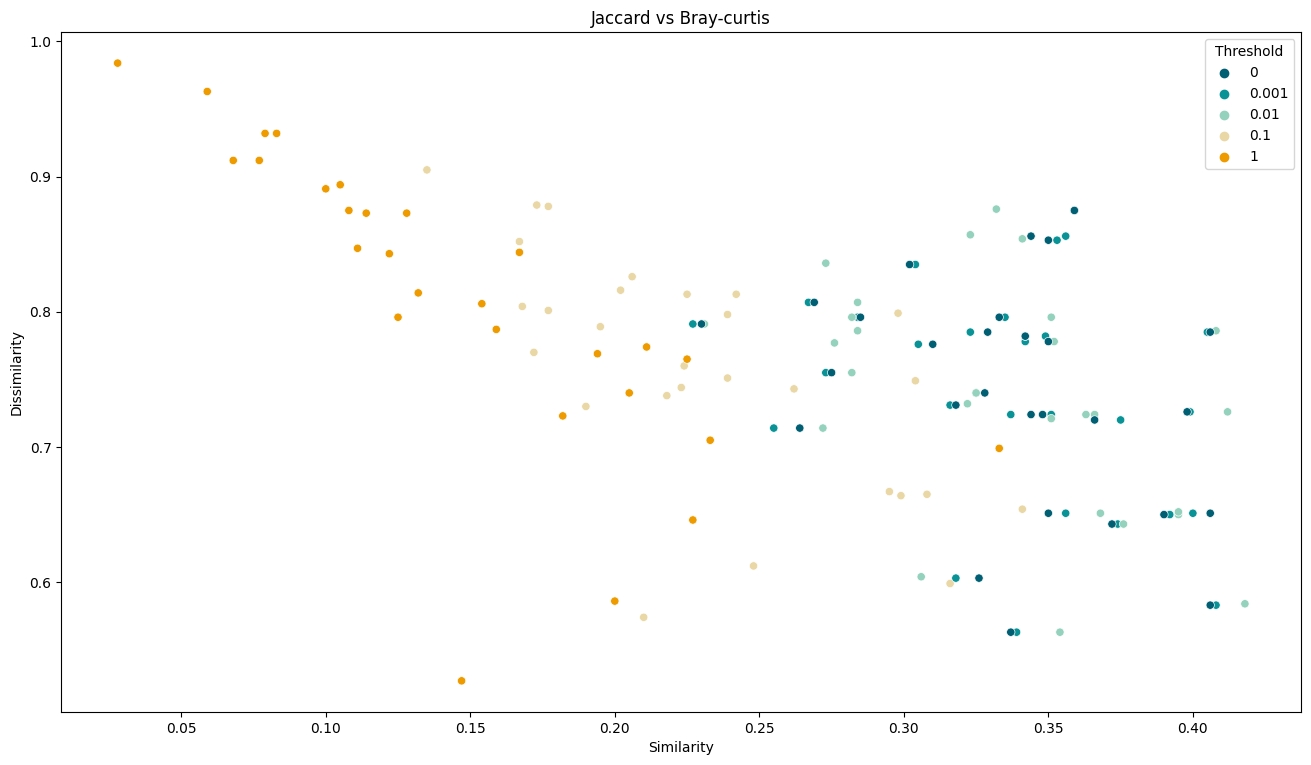

In [30]:
COLORS = ["#005f73","#0a9396","#94d2bd","#e9d8a6","#ee9b00","#ca6702","#bb3e03","#ae2012","#9b2226"]

plt.figure(figsize=(16, 9), dpi=100) 
sns.set_palette(COLORS)
scatter_plot = sns.scatterplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file')

plt.xlabel('Similarity')
plt.ylabel('Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

# Ordering the legend
handles, labels = scatter_plot.get_legend_handles_labels()
order = [labels.index(x) for x in sorted(labels)]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Threshold')

plt.show()


/home/odeds/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/odeds/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x900 with 0 Axes>

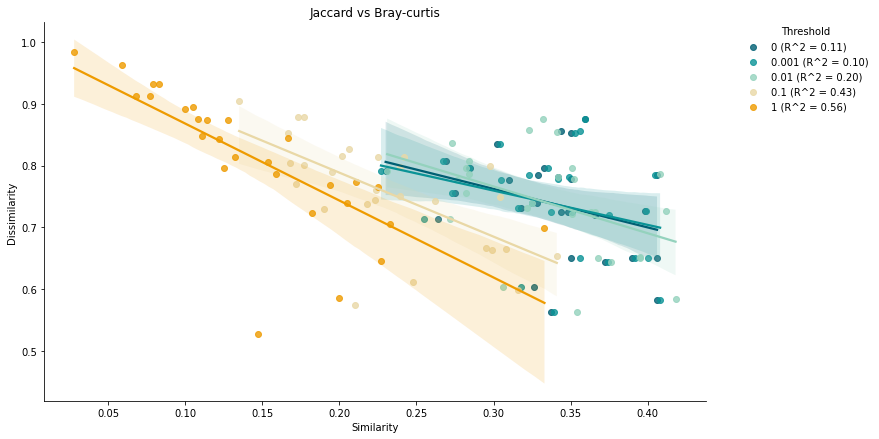

In [31]:
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)
lm = sns.lmplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file', height=6, aspect=10/6, legend=False)

lm.set_axis_labels('Similarity', 'Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

# Extracting handles and labels for the legend.
handles, labels = lm._legend_data.values(), list(lm._legend_data.keys())
handles = list(handles)

# Sorting labels and corresponding handles.
sorted_labels = sorted(labels)
sorted_handles = [handles[labels.index(label)] for label in sorted_labels]

# Calculating r^2 values for each 'thresh_file' 
legend_labels = []
for label in sorted_labels:
    subset = df_combined[df_combined['thresh_file'] == label]
    regression = linregress(subset['jaccard_scores'], subset['Dissimilarity'])
    r_squared = regression.rvalue ** 2
    legend_labels.append(f'{label} (R^2 = {r_squared:.2f})')

sorted_handles = [handles[labels.index(label.split(' (')[0])] for label in legend_labels]
plt.legend(sorted_handles, legend_labels, title='Threshold', bbox_to_anchor=(1.05, 1), loc=2, frameon=False, borderaxespad=0.)

plt.show()


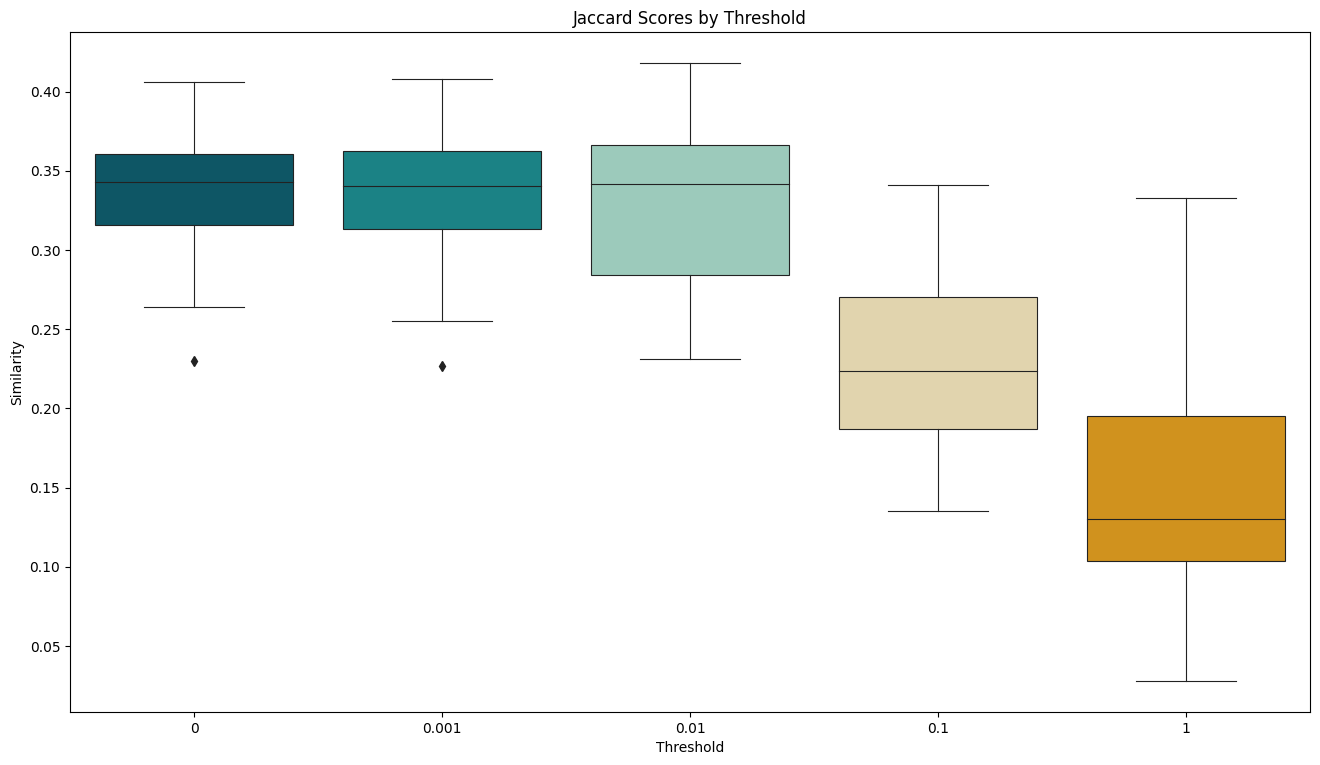

In [62]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)  
sns.boxplot(data=df_combined, x='thresh_file', y='jaccard_scores',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Similarity')
plt.title('Jaccard Scores by Threshold')
plt.show()

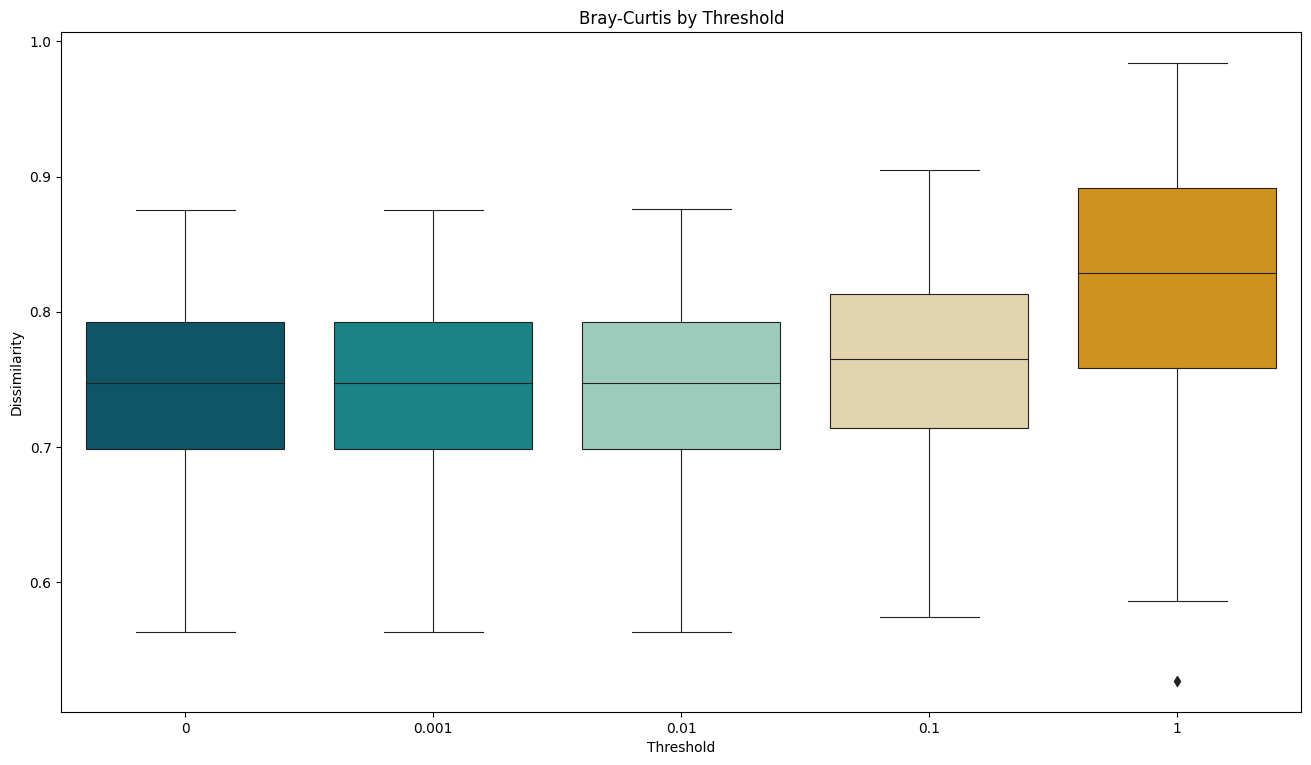

In [63]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100) 
sns.boxplot(data=df_combined, x='thresh_file', y='Dissimilarity',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Dissimilarity')
plt.title('Bray-Curtis by Threshold')
plt.show()

In [4]:
path_mp4_files = "/home/odeds/metaanalysis/Rarefaction/Code/CALCULATE_THRESHOLD/Test_thresh_reads/Summray_10M/"
csv_files = glob.glob(os.path.join(path_mp4_files, '**', '*.csv'), recursive=True)

df_dict_thresh = {}

for file in csv_files:
    thresh_file = file.split("_")[-1].rstrip('.csv')
    process_type = file.split("_")[-2]  

    df = pd.read_csv(file)   

    df['thresh_file'] = thresh_file
    df["process_type"] = process_type

    # If the threshold file is '10M' and "index" is in columns, modify the index column
    if thresh_file == '10M' and "index" in df.columns:
        df["index"] = [index.split(".")[-1] for index in df["index"]]
    
    if 'index' in df.columns:
        df.set_index('index', inplace=True)

    key_thresh = (thresh_file, process_type)
    df_dict_thresh[key_thresh] = df

# Combine all dataframes in the dictionary into a single dataframe
df_combined_10M = pd.concat(df_dict_thresh.values(), ignore_index=True)

df_combined_10M

jaccard_scores  Dissimilarity  l1_score  l2_score thresh_file  \
0             0.308          0.665   126.117    35.223         0.1   
1             0.223          0.744   140.315    20.866         0.1   
2             0.304          0.749   141.255    28.873         0.1   
3             0.299          0.664   125.699    15.749         0.1   
4             0.218          0.738   140.024    20.309         0.1   
..              ...            ...       ...       ...         ...   
135           0.285          0.796   159.020    22.826           0   
136           0.372          0.643   128.508    18.427           0   
137           0.310          0.776   155.034    25.993           0   
138           0.329          0.785   156.793    23.512           0   
139           0.326          0.603   120.441    13.380           0   

    process_type  
0            10M  
1            10M  
2            10M  
3            10M  
4            10M  
..           ...  
135          10M  
136          10M  
137          10M  
138          10M  
139          10M  

[140 rows x 6 columns]

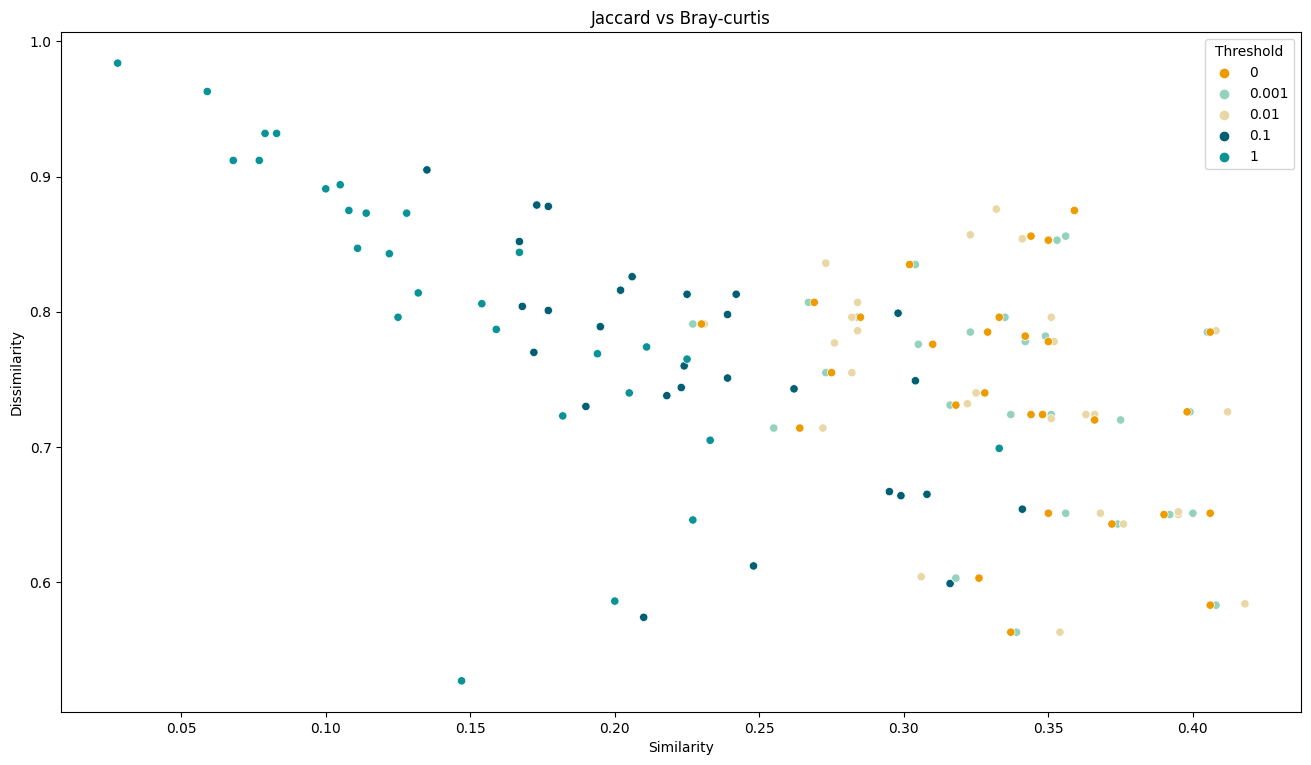

In [35]:
plt.figure(figsize=(16, 9), dpi=100) 
sns.set_palette(COLORS)
scatter_plot = sns.scatterplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file')

plt.xlabel('Similarity')
plt.ylabel('Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

handles, labels = scatter_plot.get_legend_handles_labels()
order = [labels.index(x) for x in sorted(labels)]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Threshold')

plt.show()

/home/odeds/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x900 with 0 Axes>

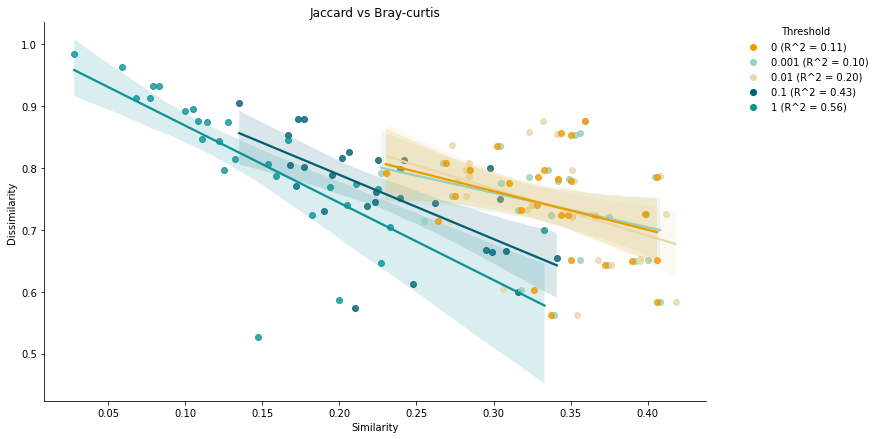

In [36]:
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)
lm = sns.lmplot(data=df_combined, x='jaccard_scores', y='Dissimilarity', hue='thresh_file', height=6, aspect=10/6, legend=False)

lm.set_axis_labels('Similarity', 'Dissimilarity')
plt.title('Jaccard vs Bray-curtis')

# Calculating r^2 values for each 'thresh_file' 
legend_labels = []
for label in sorted_labels:
    subset = df_combined[df_combined['thresh_file'] == label]
    regression = linregress(subset['jaccard_scores'], subset['Dissimilarity'])
    r_squared = regression.rvalue ** 2
    legend_labels.append(f'{label} (R^2 = {r_squared:.2f})')

sorted_handles = [handles[labels.index(label.split(' (')[0])] for label in legend_labels]
plt.legend(sorted_handles, legend_labels, title='Threshold', bbox_to_anchor=(1.05, 1), loc=2, frameon=False, borderaxespad=0.)

plt.show()


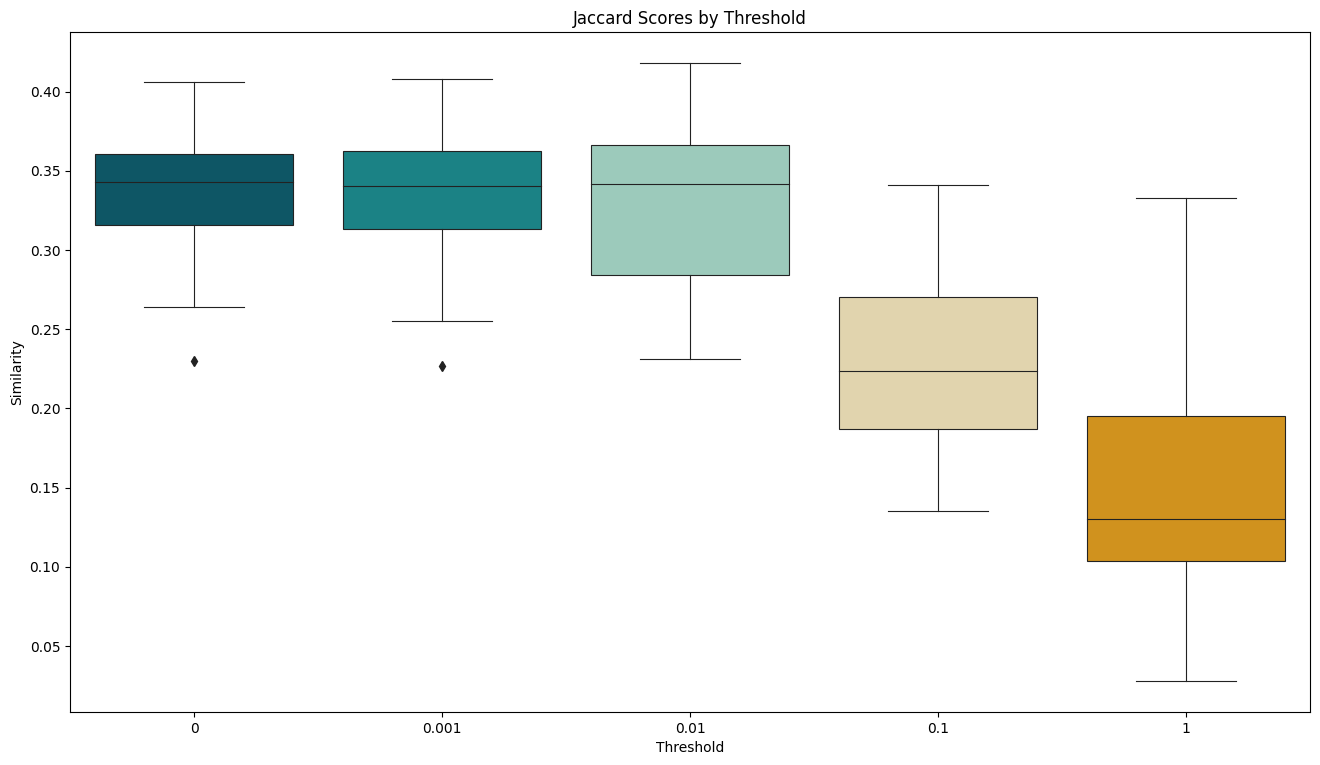

In [64]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100)  
sns.boxplot(data=df_combined, x='thresh_file', y='jaccard_scores',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Similarity')
plt.title('Jaccard Scores by Threshold')
plt.show()

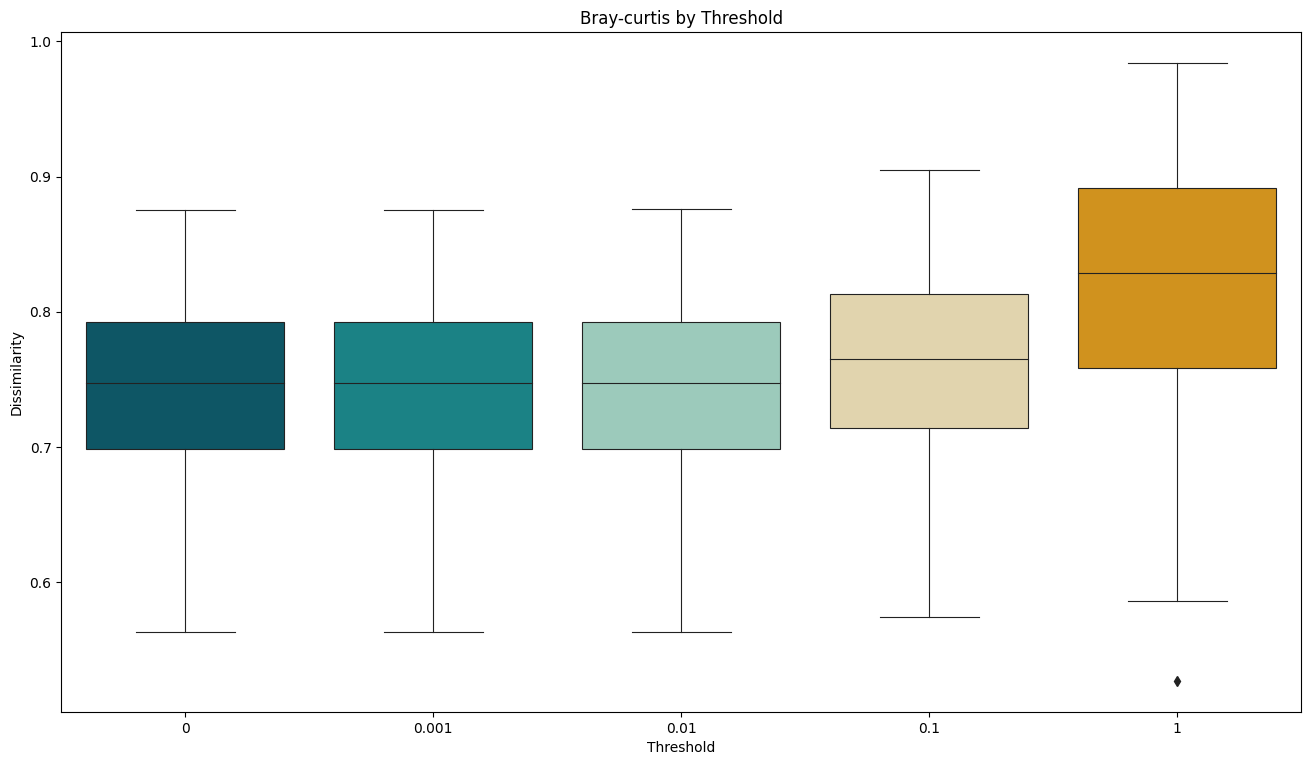

In [65]:
df_combined['thresh_file'] = pd.Categorical(df_combined['thresh_file'], categories=sorted(df_combined['thresh_file'].unique()), ordered=True)
sns.set_palette(COLORS)
plt.figure(figsize=(16, 9), dpi=100) 
sns.boxplot(data=df_combined, x='thresh_file', y='Dissimilarity',linewidth=0.8)

plt.xlabel('Threshold')
plt.ylabel('Dissimilarity')
plt.title('Bray-curtis by Threshold')
plt.show()

In [31]:
final_df = pd.concat([df_combined_5M, df_combined_10M], axis = 0)
# Group by 'thresh_file' and 'process_type', then calculate the mean for each group
final_df = final_df.groupby(['thresh_file', 'process_type']).mean().reset_index()
final_df['numeric_index'] = final_df['process_type'].str.rstrip('M').astype(float)
final_df = final_df.sort_values(by=['thresh_file', 'numeric_index']).reset_index(drop=True)
final_df.drop('numeric_index', axis=1, inplace=True)
final_df


thresh_file process_type  jaccard_scores  Dissimilarity    l1_score  \
0           0           5M        0.323571       0.746250  149.119071   
1           0          10M        0.337036       0.739036  147.641714   
2       0.001           5M        0.323536       0.746250  149.118250   
3       0.001          10M        0.336679       0.739036  147.637357   
4        0.01           5M        0.311250       0.746750  149.052143   
5        0.01          10M        0.335143       0.739464  147.403679   
6         0.1           5M        0.222964       0.760821  145.398357   
7         0.1          10M        0.230464       0.756893  143.719143   
8           1           5M        0.144679       0.812464  106.241393   
9           1          10M        0.145571       0.811143  103.861750   

    l2_score  
0  26.888464  
1  26.260321  
2  26.888464  
3  26.260321  
4  26.888857  
5  26.261143  
6  26.920071  
7  26.295929  
8  26.853929  
9  26.231821

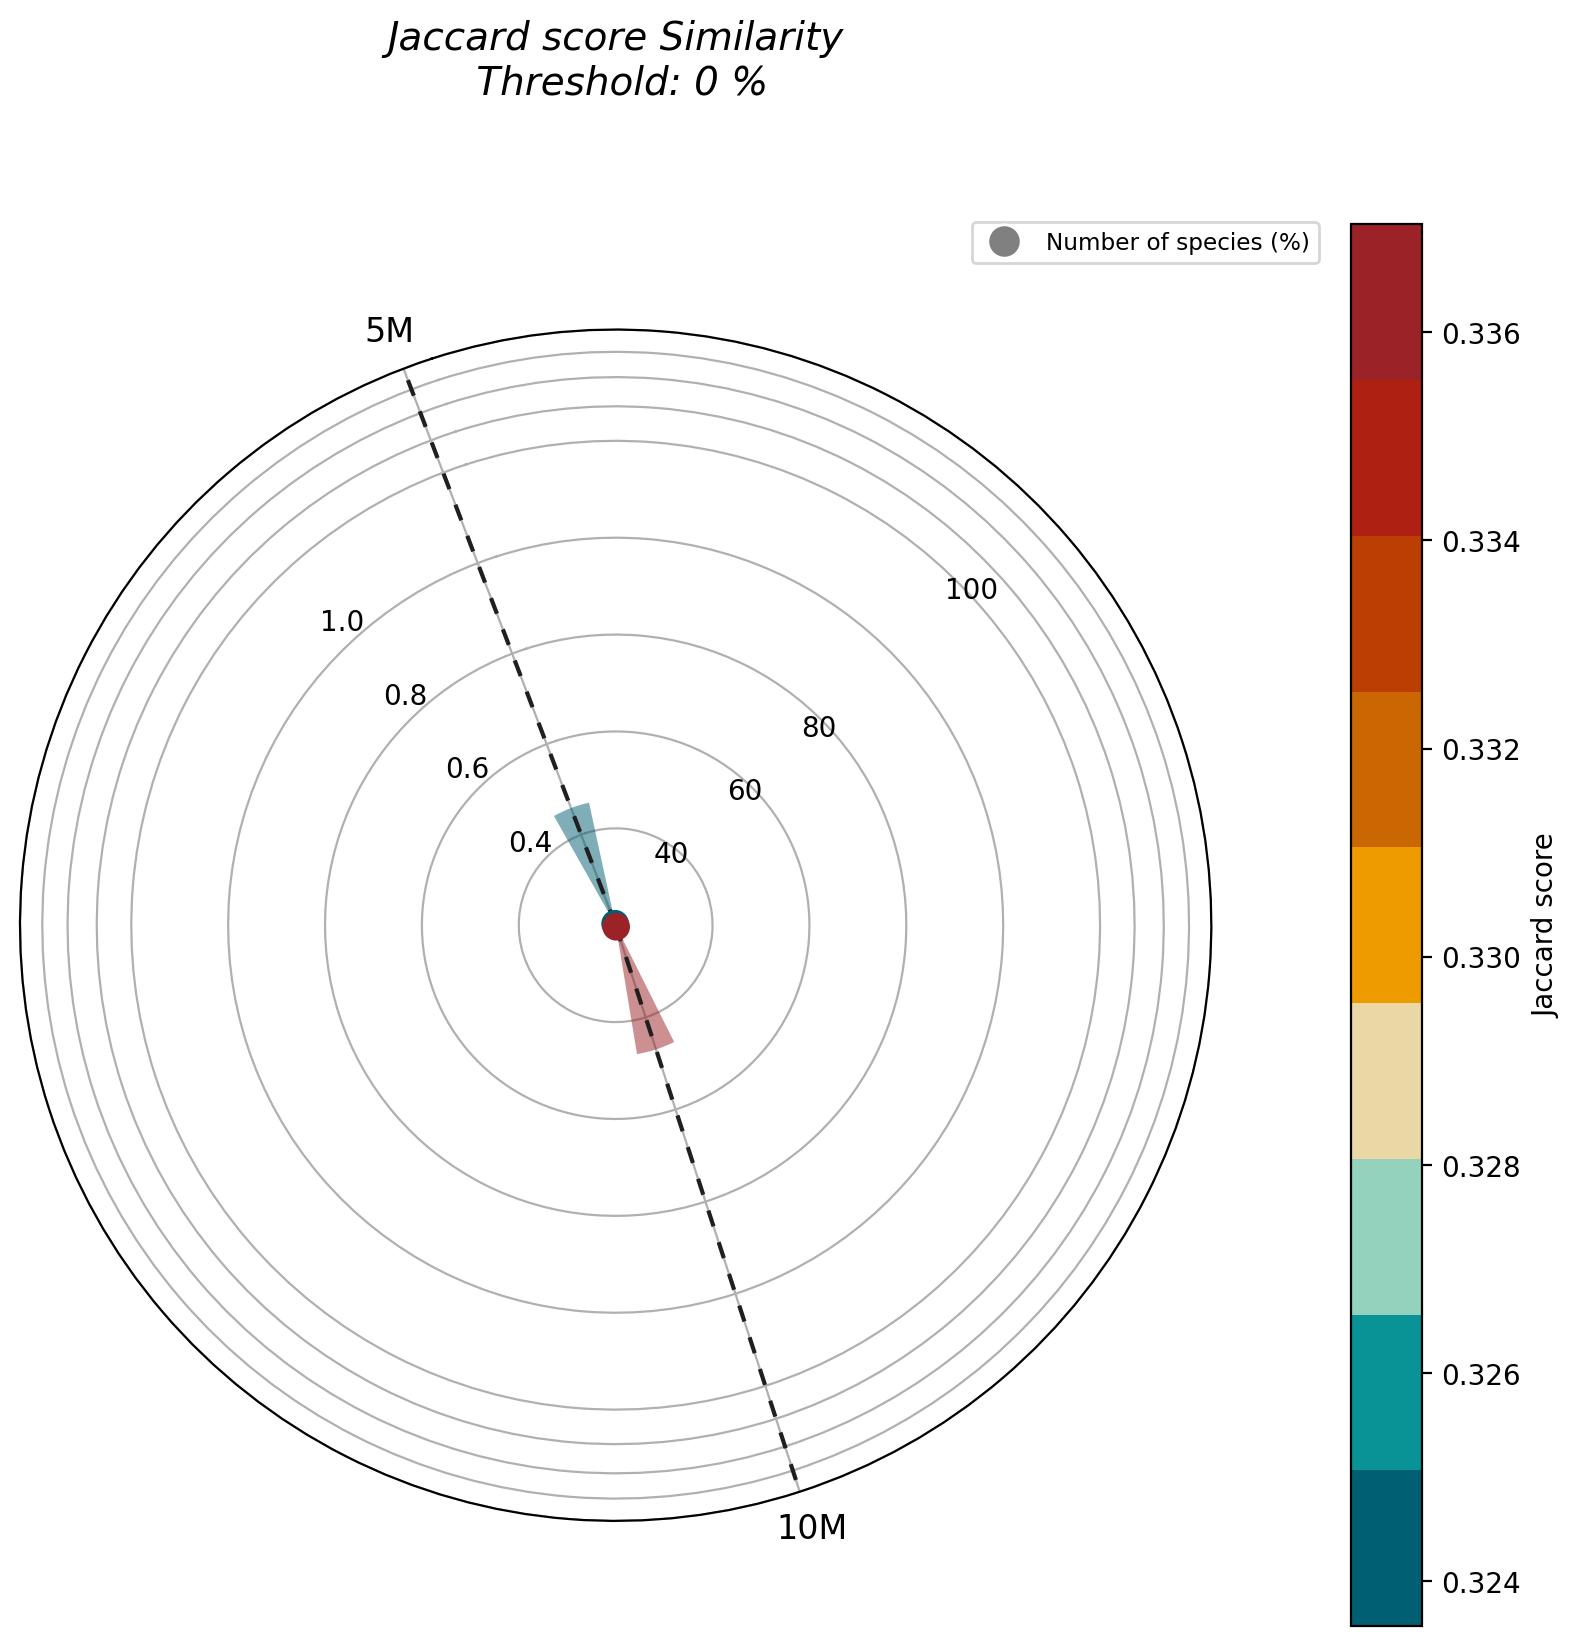

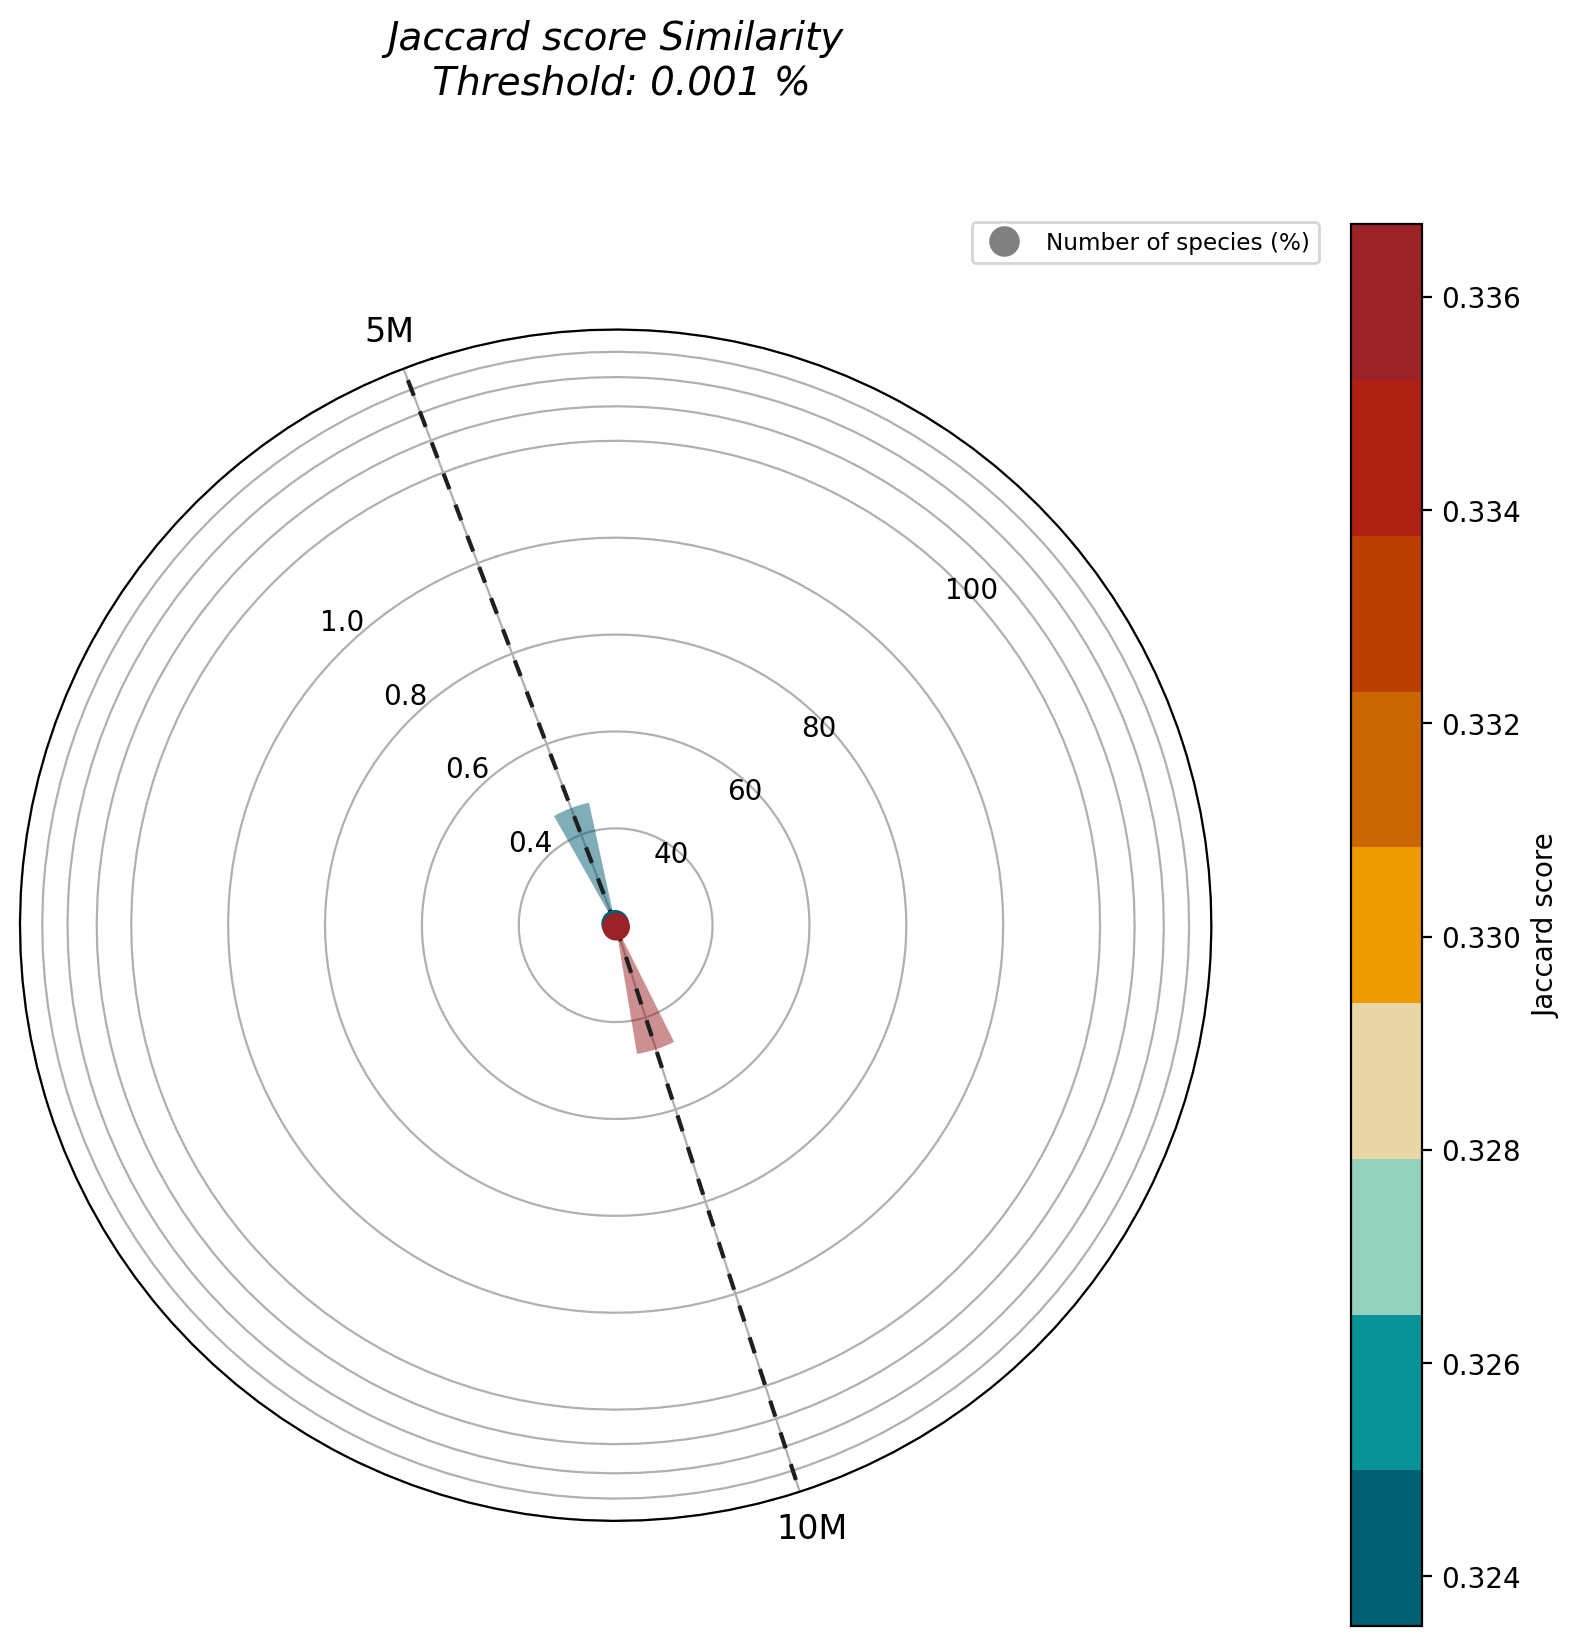

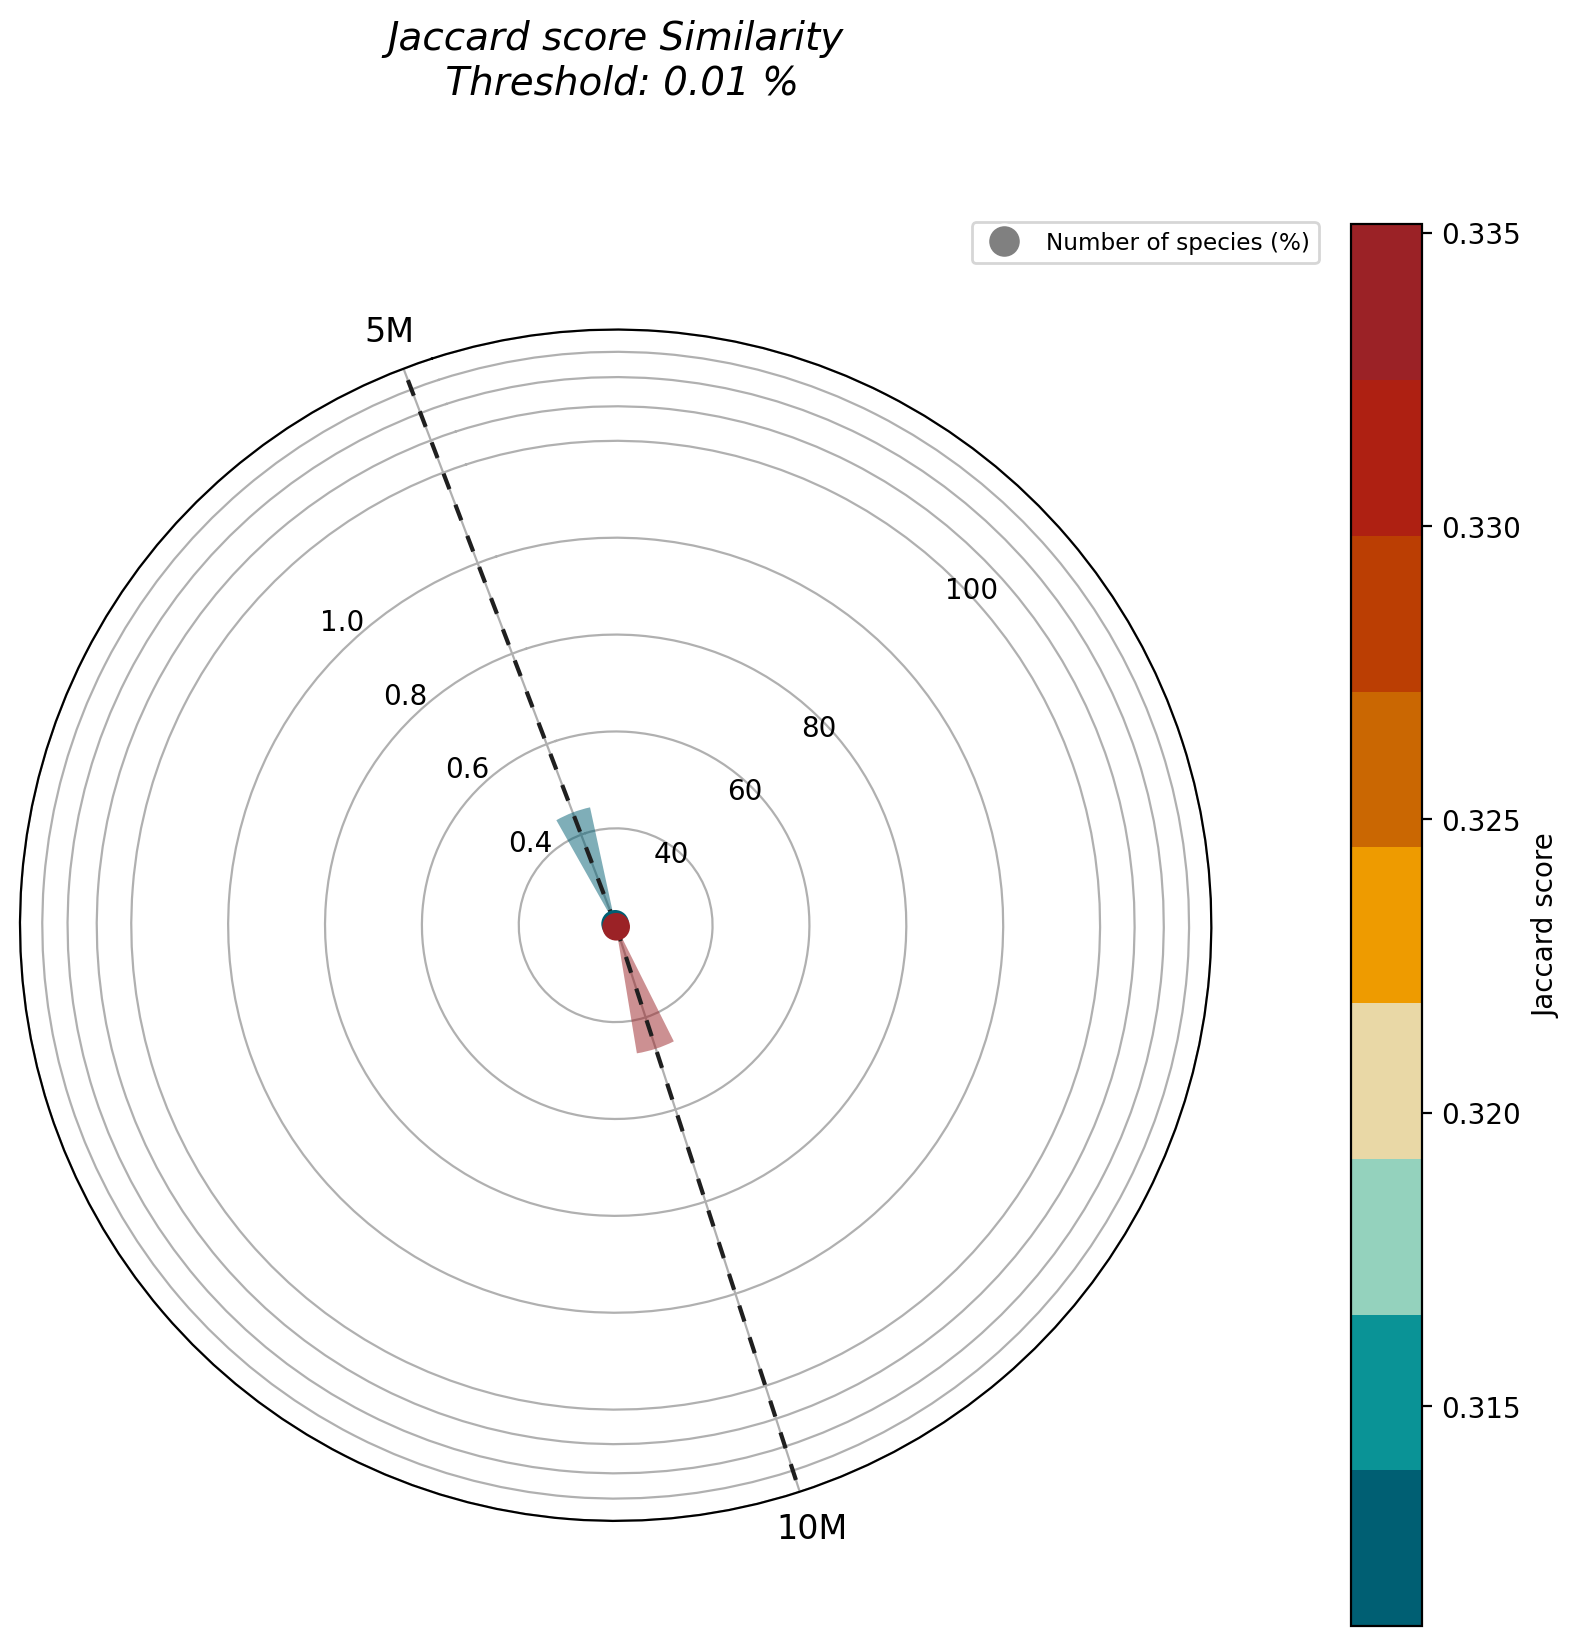

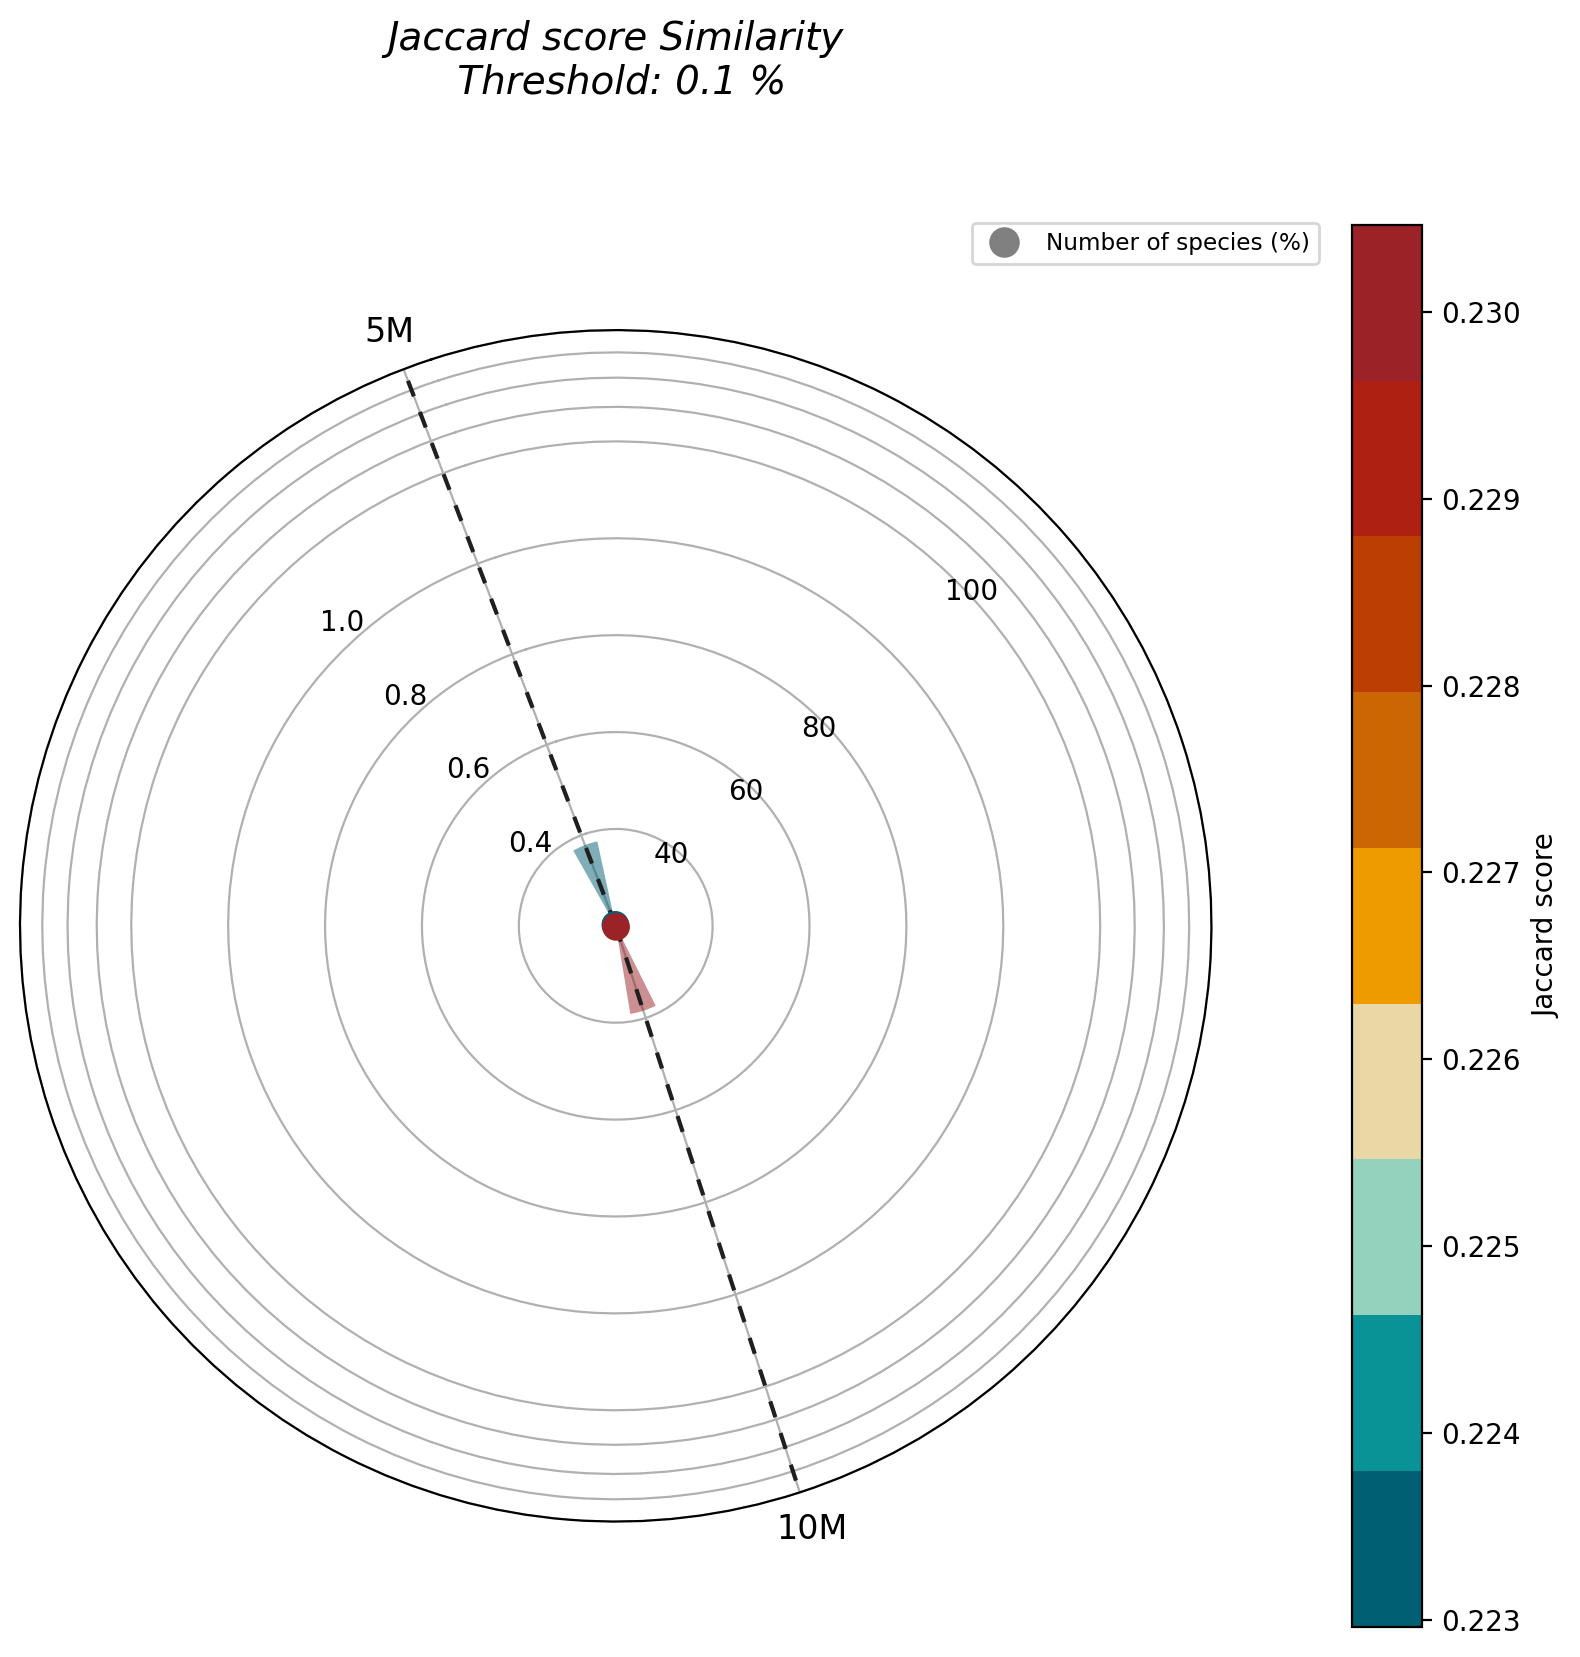

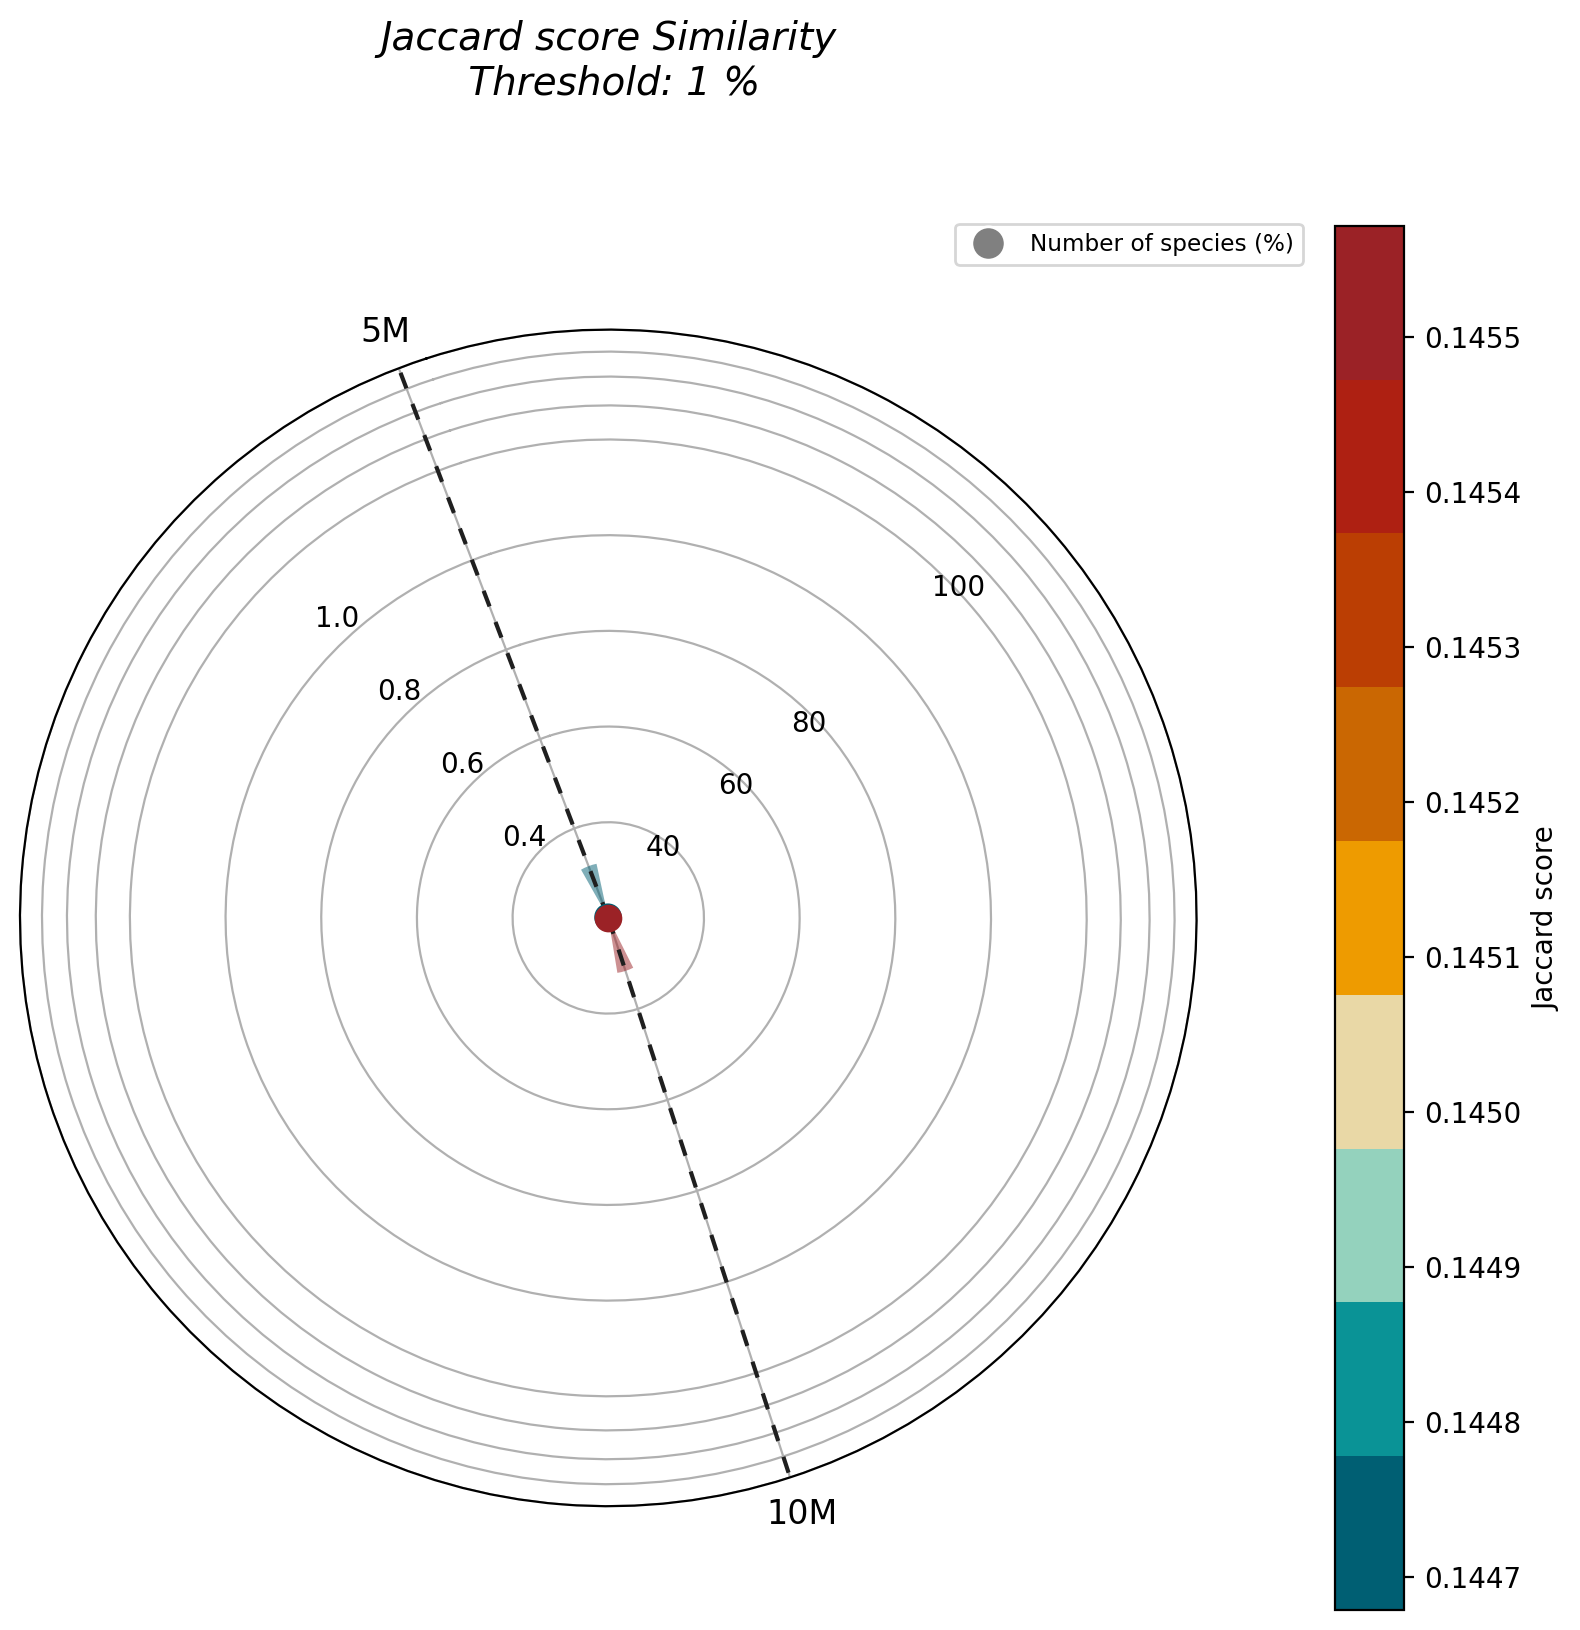

In [34]:
# Assuming df is your DataFrame
df = final_df
thresholds = ['0', '0.001', '0.01', '0.1', '1']
COLORS = ["#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=9)

for thresh in thresholds:
    df_thresh = df[df['thresh_file'] == thresh]

    if df_thresh.empty:
        print(f"No data available for threshold {thresh}")
        continue

    # Normalizer for colors
    NUMBERS = df_thresh['jaccard_scores'].values
    norm = mpl.colors.Normalize(vmin=NUMBERS.min(), vmax=NUMBERS.max())
    smappable = ScalarMappable(norm=norm, cmap=cmap)
    COLORS = smappable.to_rgba(NUMBERS)

    # Initialize layout in polar coordinates
    fig, ax = plt.subplots(figsize=(8, 16), subplot_kw={"projection": "polar"}, dpi=200)
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.set_theta_offset(1.2 * np.pi / 2)
    min_ground_truth = df_thresh['jaccard_scores'].min()
    max_ground_truth = df_thresh['jaccard_scores'].max()
    ax.set_ylim(min_ground_truth, max_ground_truth)
    ax.set_yscale('symlog', linthresh=100)

    # Set the y-ticks and customize the labels
    y_ticks = np.linspace(min_ground_truth, max_ground_truth, 11)
    ax.set_rticks(y_ticks)
    ax.set_yticklabels(np.around(np.linspace(0, 1, len(y_ticks)), 1))
    ax.set_rlabel_position(22)
    ax.set_yticklabels([])

    # Add bars for 'Ground_truth'
    ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_thresh), endpoint=False)
    LENGTHS = df_thresh['jaccard_scores'].values * 80
    ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.5, width=0.3, zorder=11, label='Jaccard-index similarity score')

    # Add dashed vertical lines
    ax.vlines(ANGLES, 0, 200, color="#1f1f1f", ls=(0, (4, 4)), zorder=11)

    # Add dots for 'Species_mean'
    MEAN_GAIN = df_thresh['jaccard_scores'].values
    ax.scatter(ANGLES, MEAN_GAIN, s=80, color=COLORS, zorder=11, label='Species counts')

    # Add labels for the regions
    REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in df_thresh['process_type'].values]
    ax.set_xticks(ANGLES)
    ax.set_xticklabels(REGION, size=12)
    ax.set_yticks(np.arange(0, 200, step=20))
    
    # Add scale starting at 1M and ending at 45M
    PAD = 10
    ax.text(-0.75 * np.pi / 2, 10 + PAD, "40", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 30 + PAD, "60", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 50 + PAD, "80", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 100 + PAD, "100", ha="right", size=10)

    ax.text(0.25 * np.pi / 2, 10 + PAD, "0.4", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 30 + PAD, "0.6", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 50 + PAD, "0.8", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 70 + PAD, "1.0", ha="right", size=10)


    # Add custom legend with adjusted position
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Number of species (%)', markerfacecolor='gray', markersize=12)]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize='small')

    # Add color legend with adjusted size and padding
    cbar = plt.colorbar(smappable, ax=ax, orientation='vertical', fraction=0.05, pad=0.1)
    cbar.set_label('Jaccard score')

    # Add title and subtitle at the top of the chart
    plt.title(f'Jaccard score Similarity\n Threshold: {thresh} %', style='italic', size=14, pad=85)

    # Adjust the layout to prevent overlap and clipping
    plt.tight_layout()

    # Display the chart
    plt.show()


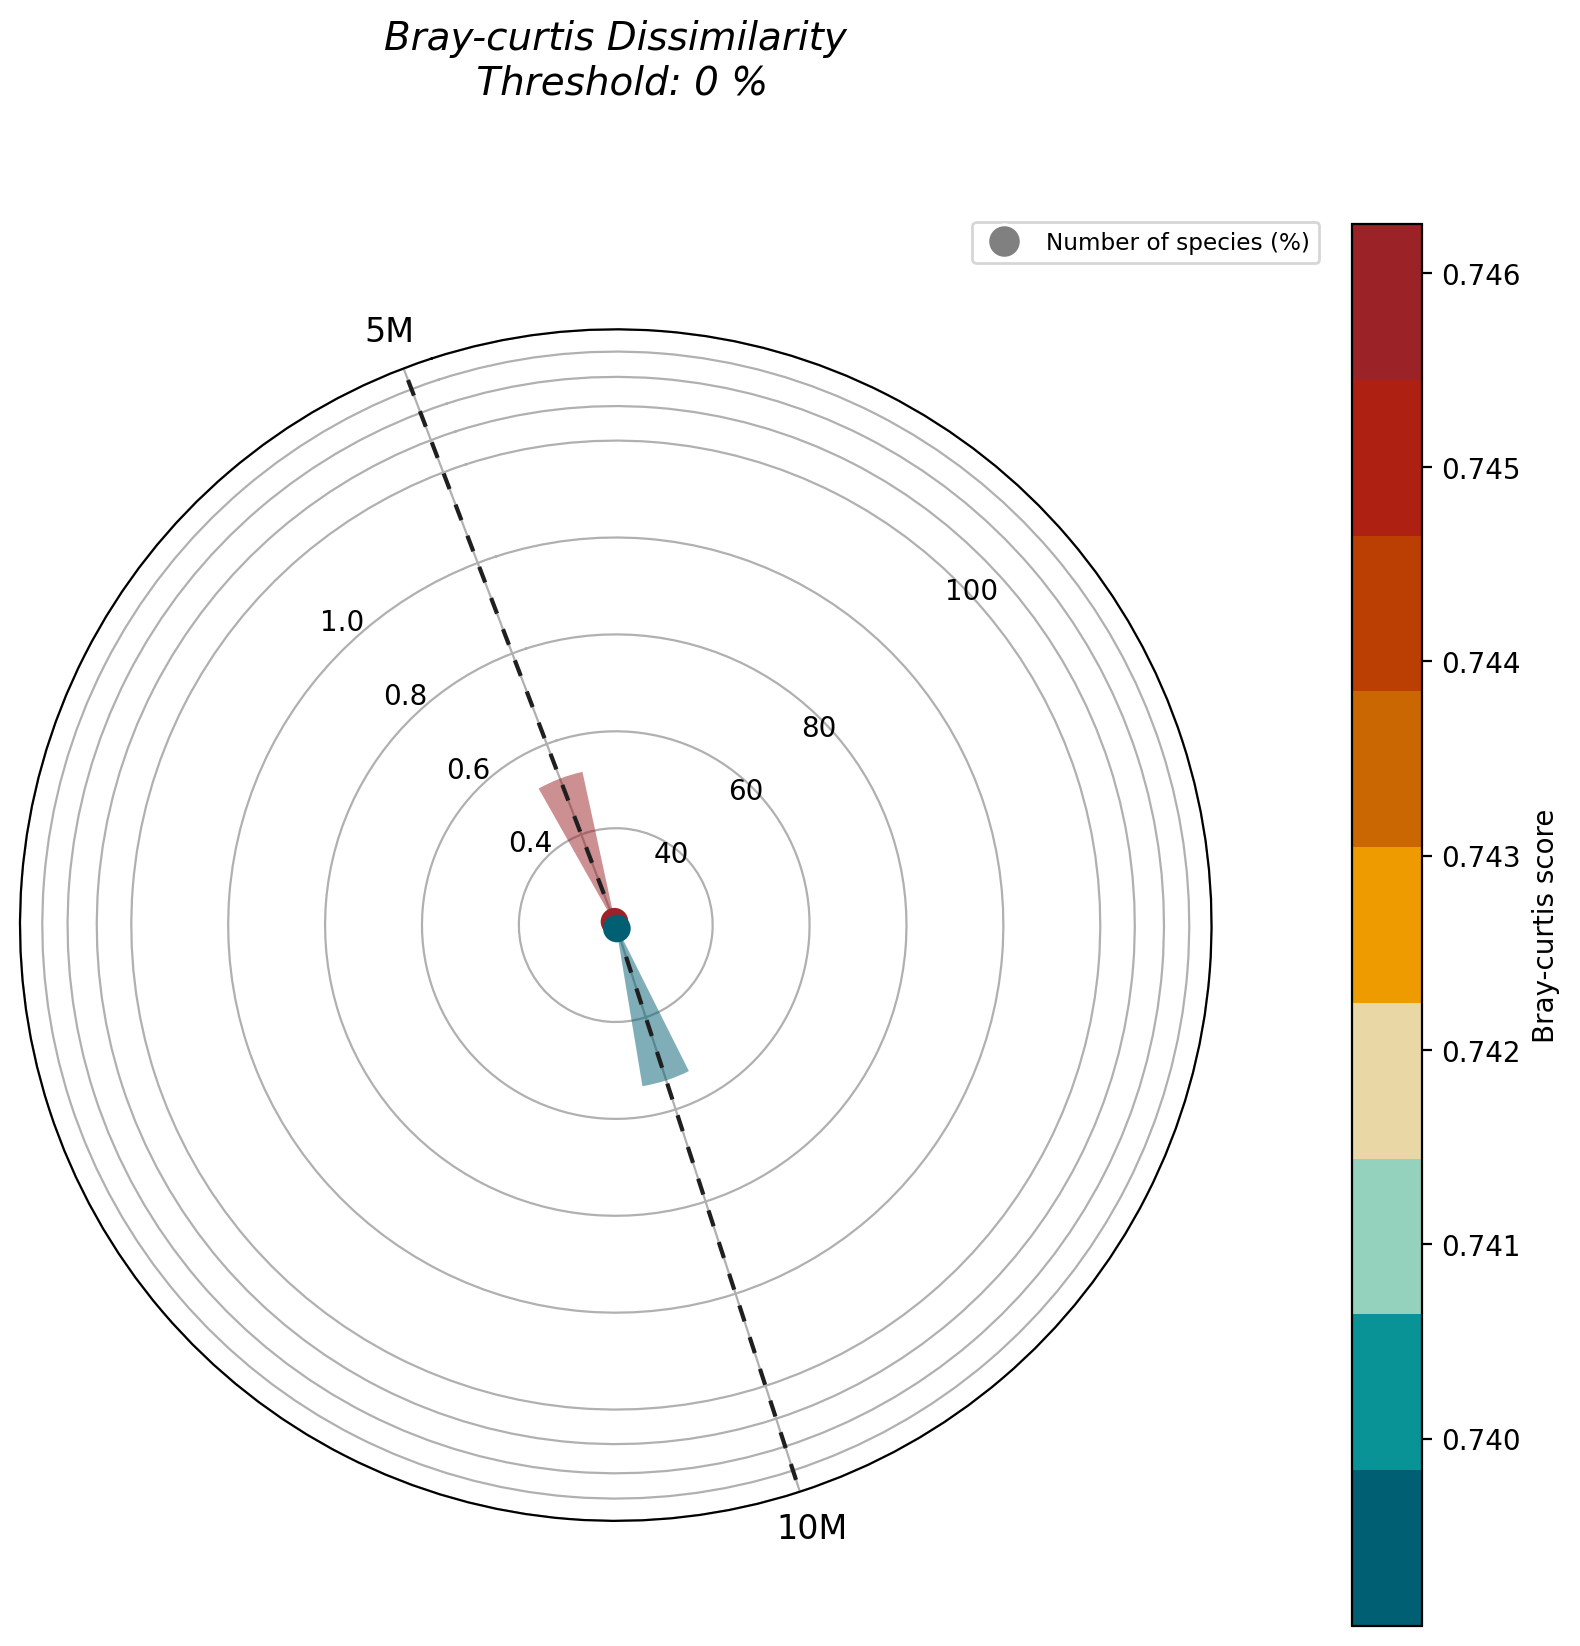

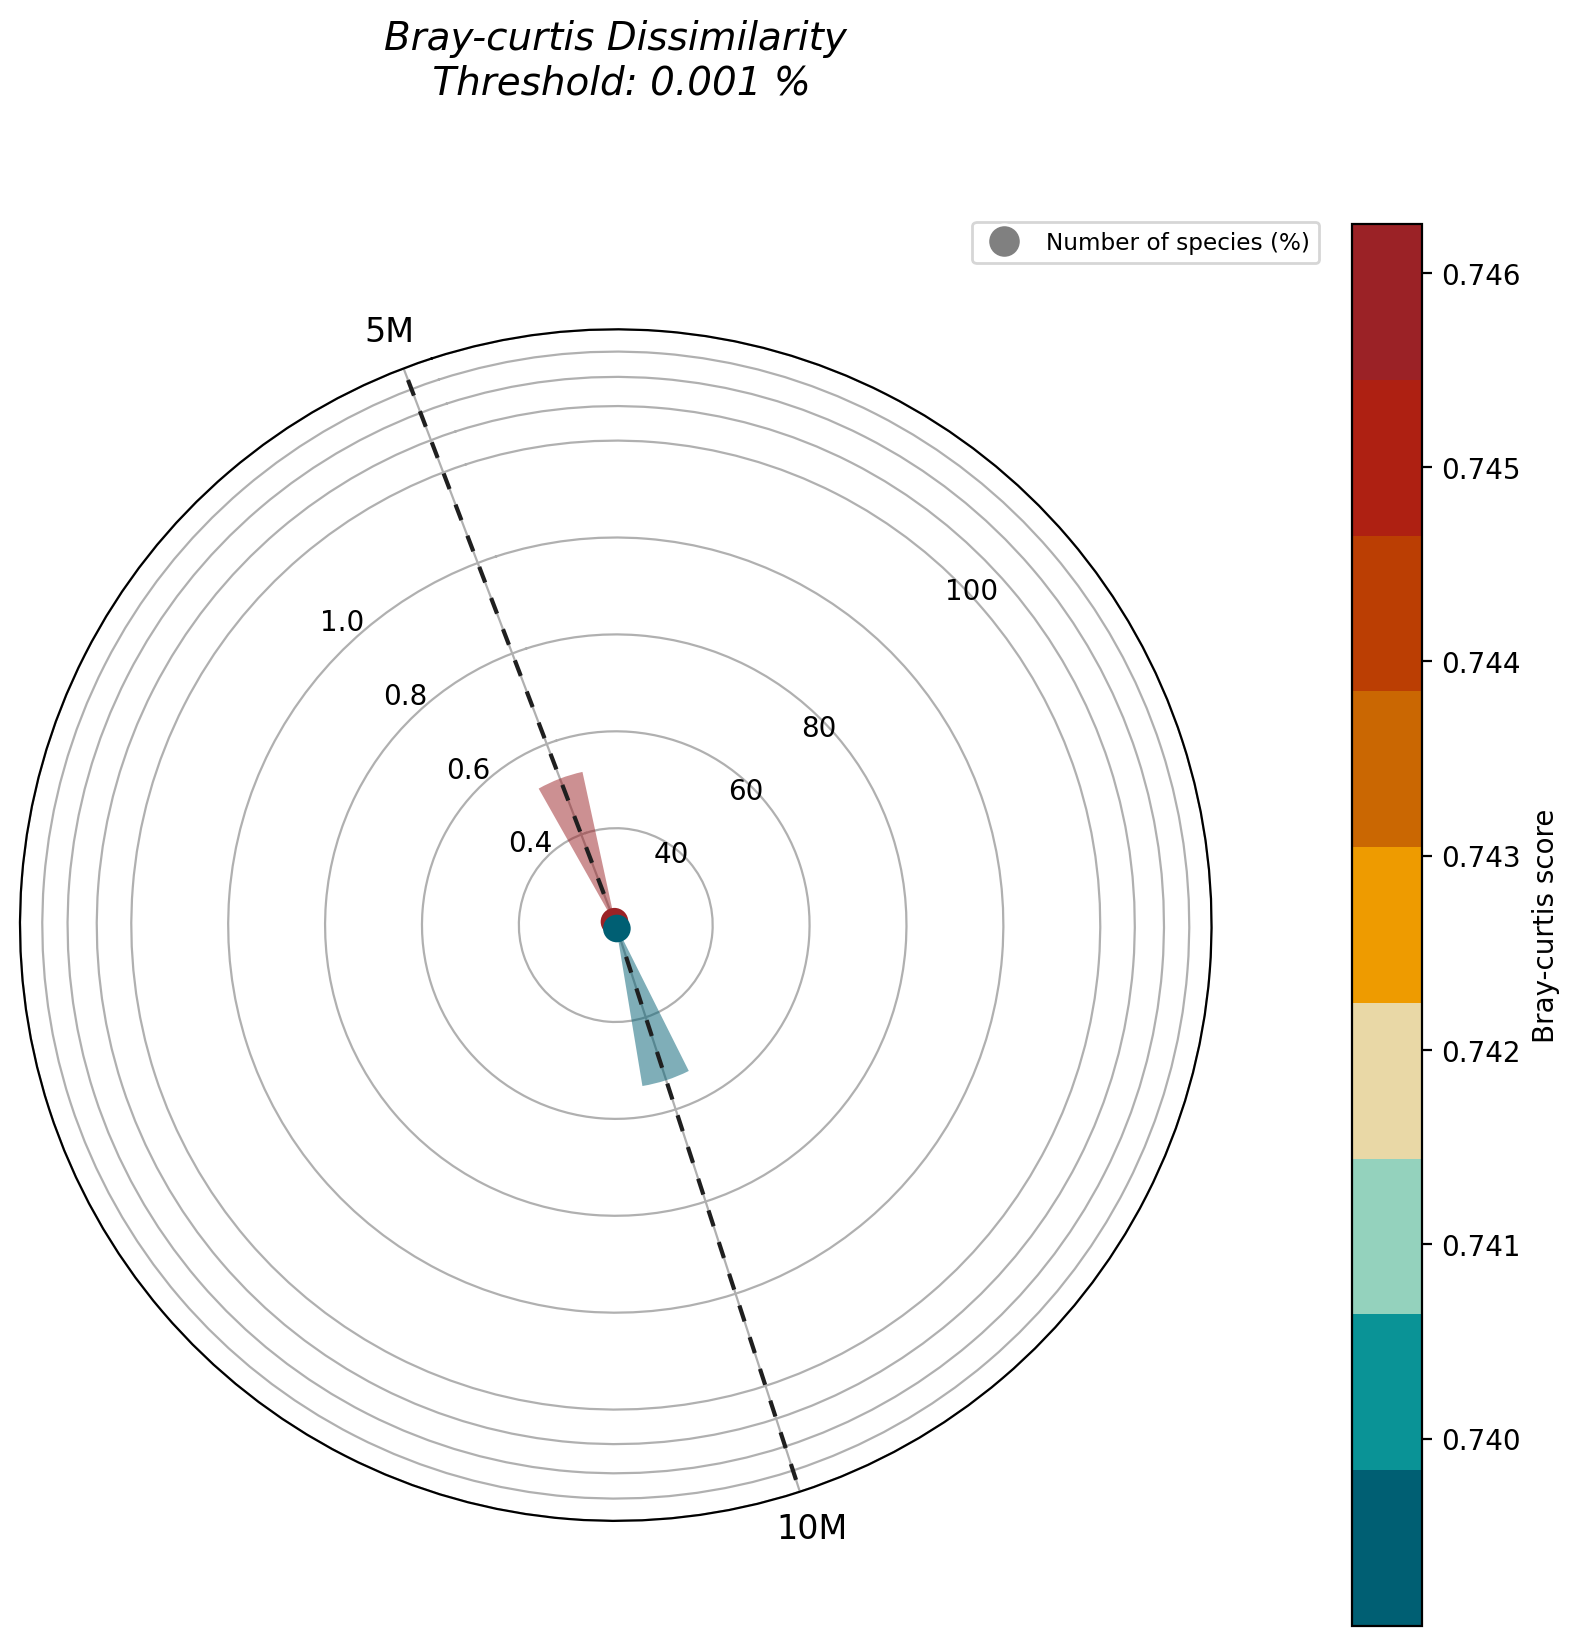

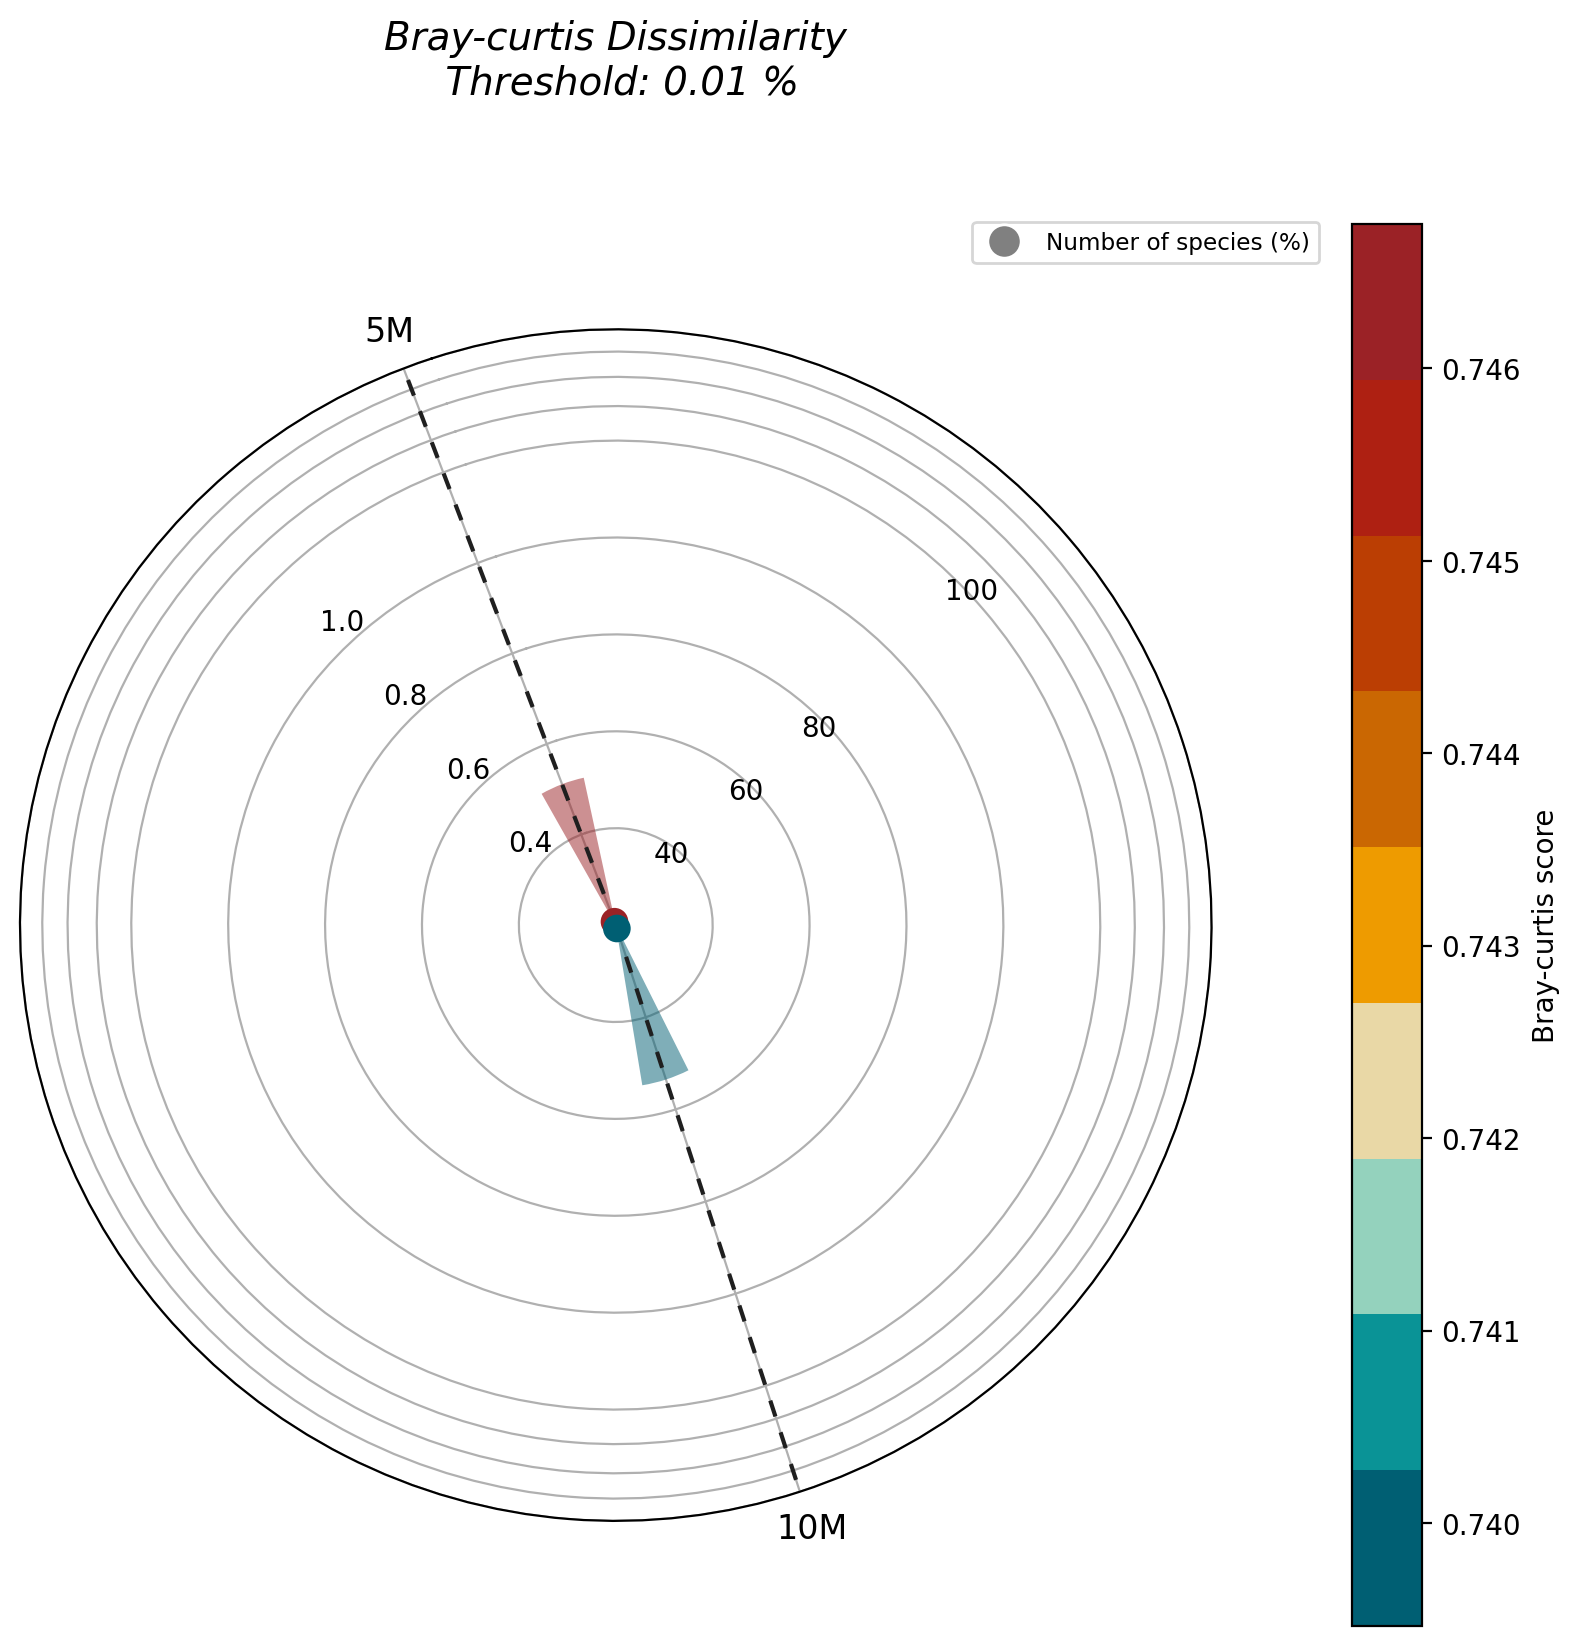

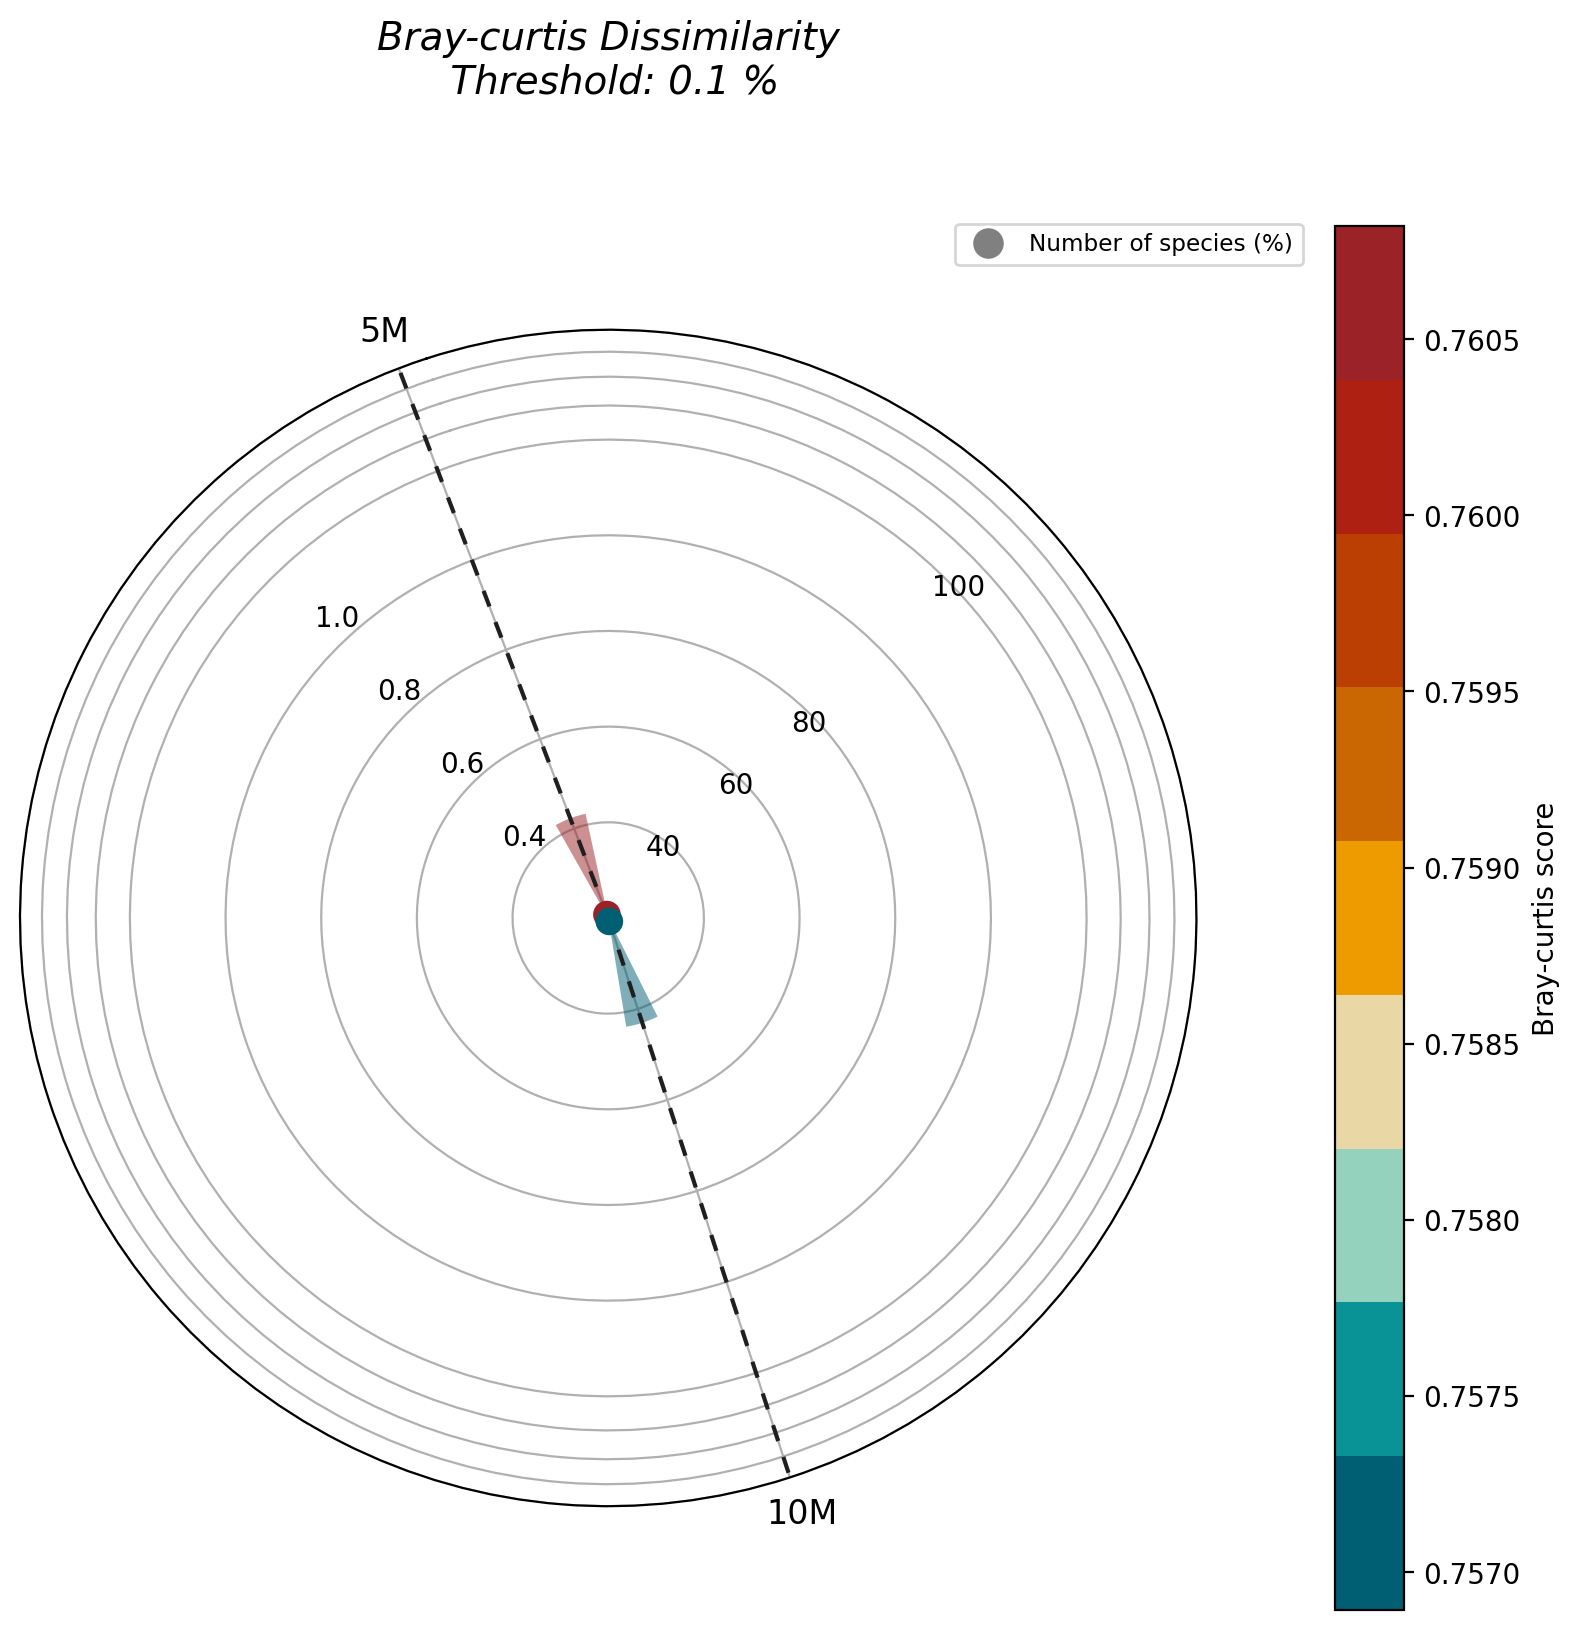

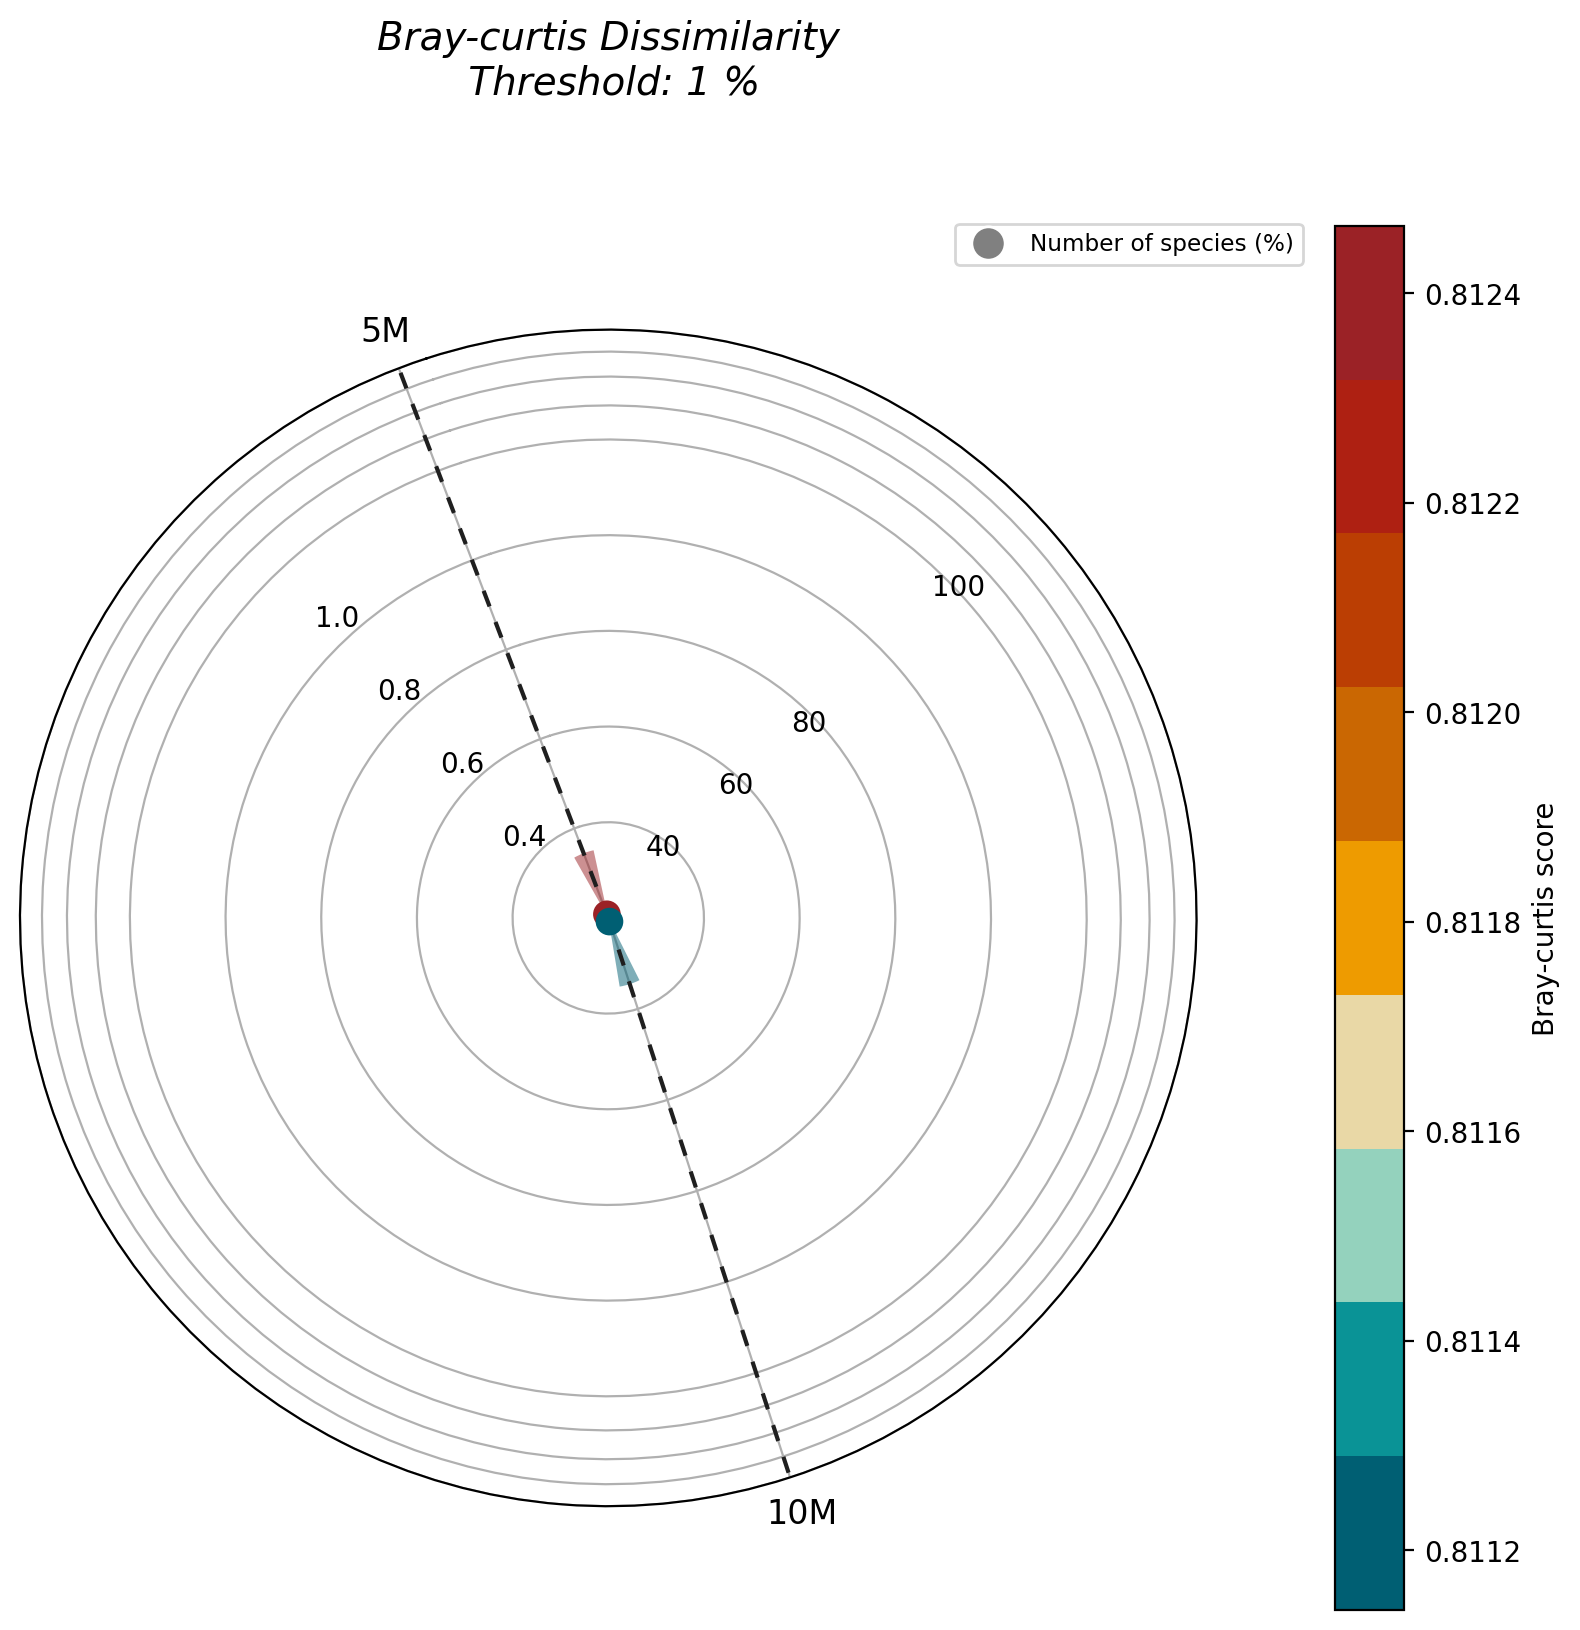

In [35]:
# Assuming df is your DataFrame
df = final_df
thresholds = ['0', '0.001', '0.01', '0.1', '1']
COLORS = ["#005f73", "#0a9396", "#94d2bd", "#e9d8a6", "#ee9b00", "#ca6702", "#bb3e03", "#ae2012", "#9b2226"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=9)

for thresh in thresholds:
    df_thresh = df[df['thresh_file'] == thresh]

    if df_thresh.empty:
        print(f"No data available for threshold {thresh}")
        continue

    # Normalizer for colors
    NUMBERS = df_thresh['Dissimilarity'].values
    norm = mpl.colors.Normalize(vmin=NUMBERS.min(), vmax=NUMBERS.max())
    smappable = ScalarMappable(norm=norm, cmap=cmap)
    COLORS = smappable.to_rgba(NUMBERS)

    # Initialize layout in polar coordinates
    fig, ax = plt.subplots(figsize=(8, 16), subplot_kw={"projection": "polar"}, dpi=200)
    fig.patch.set_facecolor("white")
    ax.set_facecolor("white")

    ax.set_theta_offset(1.2 * np.pi / 2)
    min_ground_truth = df_thresh['Dissimilarity'].min()
    max_ground_truth = df_thresh['Dissimilarity'].max()
    ax.set_ylim(min_ground_truth, max_ground_truth)
    ax.set_yscale('symlog', linthresh=100)

    # Set the y-ticks and customize the labels
    y_ticks = np.linspace(min_ground_truth, max_ground_truth, 11)
    ax.set_rticks(y_ticks)
    ax.set_yticklabels(np.around(np.linspace(0, 1, len(y_ticks)), 1))
    ax.set_rlabel_position(22)
    ax.set_yticklabels([])

    # Add bars for 'Ground_truth'
    ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_thresh), endpoint=False)
    LENGTHS = df_thresh['jaccard_scores'].values * 100
    ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.5, width=0.3, zorder=11, label='Bray-curtis similarity score')

    # Add dashed vertical lines
    ax.vlines(ANGLES, 0, 200, color="#1f1f1f", ls=(0, (4, 4)), zorder=11)

    # Add dots for 'Species_mean'
    MEAN_GAIN = df_thresh['Dissimilarity'].values
    ax.scatter(ANGLES, MEAN_GAIN, s=80, color=COLORS, zorder=11, label='Species counts')

    # Add labels for the regions
    REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in df_thresh['process_type'].values]
    ax.set_xticks(ANGLES)
    ax.set_xticklabels(REGION, size=12)
    ax.set_yticks(np.arange(0, 200, step=20))
    
    # Add scale starting at 1M and ending at 45M
    PAD = 10
    ax.text(-0.75 * np.pi / 2, 10 + PAD, "40", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 30 + PAD, "60", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 50 + PAD, "80", ha="right", size=10)
    ax.text(-0.75 * np.pi / 2, 100 + PAD, "100", ha="right", size=10)

    ax.text(0.25 * np.pi / 2, 10 + PAD, "0.4", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 30 + PAD, "0.6", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 50 + PAD, "0.8", ha="right", size=10)
    ax.text(0.25 * np.pi / 2, 70 + PAD, "1.0", ha="right", size=10)


    # Add custom legend with adjusted position
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Number of species (%)', markerfacecolor='gray', markersize=12)]
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize='small')

    # Add color legend with adjusted size and padding
    cbar = plt.colorbar(smappable, ax=ax, orientation='vertical', fraction=0.05, pad=0.1)
    cbar.set_label('Bray-curtis score')

    # Add title and subtitle at the top of the chart
    plt.title(f'Bray-curtis Dissimilarity\n Threshold: {thresh} %', style='italic', size=14, pad=85)

    # Adjust the layout to prevent overlap and clipping
    plt.tight_layout()

    # Display the chart
    plt.show()
